## Business Question


🔹Demand & Supply

👉 When, where, and for which vehicle types is ride demand the highest?

What to know?
*   What are the peak hours, days, or months for ride bookings?
*   Which pickup and drop locations have the highest ride demand?
*   Which vehicle types are most in demand (Bike, Auto, Sedan, etc.)?

🔹Operational Efficiency

👉 How efficient are ride operations in terms of cancellations, wait times, and incomplete rides?

What to know?
*   How often do cancellations occur (by drivers vs. customers)?
*   What are the top reasons for cancellations, and when do they happen most?
*   How long is the average wait time (VTAT: Vehicle Turnaround Time) and customer wait time (CTAT)? => Can be affected by traffic jam, etc.
*  How many rides end as “Incomplete” and why?

🔹Customer Insights

👉 What do customer behaviors and preferences (payment method, ratings, satisfaction) reveal about their experience?

What to know?

*   Which payment methods are most commonly used (UPI, Debit Card, Cash, etc.)?
*   How does customer rating compare with driver rating?
*   Do high-value rides correlate with higher customer satisfaction?

🔹Revenue & Growth

👉 Which factors (route, distance, vehicle type) drive the highest revenue and growth opportunities?

What to know?

*   What is the distribution of booking values (revenue per ride)?
*   Which routes/locations generate the highest revenue?
*   How does ride distance affect booking value and cancellation rate?

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Download Dataset

Username: timotyjoel

Token: 8d56a52adc4289db8859ea076f5a0fa9

token : 497c35140f83b336b0bfebef5cb10ad0

In [ ]:
import kagglehub
kagglehub.login("kaggle.json")

Kaggle credentials set.


Download the dataset from Kaggle using API key

In [ ]:
# Download latest version
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)

100%|██████████| 16.5M/16.5M [00:01<00:00, 9.44MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yashdevladdha/uber-ride-analytics-dashboard/versions/2


In [ ]:
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")
print(f"Dataset telah tersedia di folder: {path}")

# Mencari file CSV di dalam folder tersebut dan memuatnya
try:
    # Mencari file yang berakhiran .csv di dalam folder 'path'
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

    if not csv_files:
        print("Error: Tidak ada file CSV yang ditemukan di dalam folder dataset.")
        # Opsi: Cetak semua isi folder untuk debugging
        print(f"Isi folder: {os.listdir(path)}")
    else:
        # Mengambil nama file CSV pertama yang ditemukan
        csv_filename = csv_files[0]
        # Membuat path lengkap ke file CSV
        full_csv_path = os.path.join(path, csv_filename)

        # Memuat dataset ke dalam DataFrame pandas
        df = pd.read_csv(full_csv_path)
        print(f"Dataset '{csv_filename}' berhasil dimuat!")

        # Menampilkan 5 baris pertama untuk memastikan data ter-load dengan benar
        print("\nVerifikasi data (5 baris pertama):")
        display(df.head())

except Exception as e:
    print(f"Terjadi error saat memuat data: {e}")

Using Colab cache for faster access to the 'uber-ride-analytics-dashboard' dataset.
Dataset telah tersedia di folder: /kaggle/input/uber-ride-analytics-dashboard
Dataset 'ncr_ride_bookings.csv' berhasil dimuat!

Verifikasi data (5 baris pertama):


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


## Data Assesing

Show the top row of dataset

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


Viewing the shape of dataset

In [ ]:
df.shape

(150000, 21)

Note: Masing masing ditampilkan unique valuenya ada apa aja dan jumlahnya > biar tau mau ngisi missing value ya pake apa.

In [ ]:
print("Unique values from each columns:")
df.nunique()

Unique values from each columns:


,0
Date,365
Time,62910
Booking ID,148767
Booking Status,5
Customer ID,148788
Vehicle Type,7
Pickup Location,176
Drop Location,176
Avg VTAT,181
Avg CTAT,351


Checking the amount of missing values from this dataset.

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


Show the percentage of each missing value so we can decide what column to drop (still think about the columns summary to know the column correlations.)

In [ ]:
print("Percentage of Each Missing Values")
percentage_missing = df.isnull().sum() / len(df) * 100
print(percentage_missing.sort_values(ascending=False))

Percentage of Each Missing Values
Incomplete Rides Reason              94.0
Incomplete Rides                     94.0
Reason for cancelling by Customer    93.0
Cancelled Rides by Customer          93.0
Cancelled Rides by Driver            82.0
Driver Cancellation Reason           82.0
Driver Ratings                       38.0
Customer Rating                      38.0
Avg CTAT                             32.0
Ride Distance                        32.0
Booking Value                        32.0
Payment Method                       32.0
Avg VTAT                              7.0
Customer ID                           0.0
Booking Status                        0.0
Booking ID                            0.0
Time                                  0.0
Date                                  0.0
Pickup Location                       0.0
Drop Location                         0.0
Vehicle Type                          0.0
dtype: float64


In [ ]:
df['Booking Status'].value_counts()

,count
Booking Status,
Completed,93000
Cancelled by Driver,27000
No Driver Found,10500
Cancelled by Customer,10500
Incomplete,9000


### Assessing the Cancellation Reason

In [ ]:
df['Driver Cancellation Reason'].value_counts()

,count
Driver Cancellation Reason,
Customer related issue,6837
The customer was coughing/sick,6751
Personal & Car related issues,6726
More than permitted people in there,6686


In [ ]:
df['Reason for cancelling by Customer'].value_counts()

,count
Reason for cancelling by Customer,
Wrong Address,2362
Change of plans,2353
Driver is not moving towards pickup location,2335
Driver asked to cancel,2295
AC is not working,1155


In [ ]:
df[df['Reason for cancelling by Customer'] == 'Driver asked to cancel'].isna().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,2295


In [ ]:
df['Incomplete Rides Reason'].value_counts()

,count
Incomplete Rides Reason,
Customer Demand,3040
Vehicle Breakdown,3012
Other Issue,2948


Assess the values from 'cancelled' features so we can know what the 'cancelled' features consist of.

In [ ]:
df['Cancelled Rides by Customer'].unique()

array([nan,  1.])

In [ ]:
df['Cancelled Rides by Driver'].unique()

array([nan,  1.])

In [ ]:
df['Incomplete Rides'].unique()

array([nan,  1.])

Find out what are the values in features that is wanted to be analyzed.

In [ ]:
df['Booking Status'].value_counts()

,count
Booking Status,
Completed,93000
Cancelled by Driver,27000
No Driver Found,10500
Cancelled by Customer,10500
Incomplete,9000


In [ ]:
df.groupby('Booking Status')['Customer Rating'].value_counts()

Booking Status  Customer Rating
Completed       4.9                11642
                4.6                11533
                4.3                10995
                4.2                10697
                4.5                 5890
                4.8                 5880
                5.0                 5837
                4.7                 5763
                4.1                 5396
                4.4                 5279
                3.9                 2370
                3.8                 2357
                3.7                 2354
                3.6                 1194
                4.0                 1185
                3.1                 1008
                3.4                  928
                3.3                  900
                3.2                  881
                3.0                  468
                3.5                  443
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


### Assessing Missing Values Around 30%

In [ ]:
print('Missing values in incomplete rides feature:')
df['Incomplete Rides'].isnull().sum()

Missing values in incomplete rides feature:


np.int64(141000)

In [ ]:
len(df['Incomplete Rides']) - df['Incomplete Rides'].isnull().sum()

np.int64(9000)

In [ ]:
df.groupby('Customer ID')['Customer Rating'].value_counts()

,,count
Customer ID,Customer Rating,
"""CID1000234""",4.3,1
"""CID1000323""",4.5,1
"""CID1000448""",4.2,1
"""CID1000469""",4.3,1
"""CID1000588""",4.1,1
...,...,...
"""CID9999732""",4.7,1
"""CID9999751""",4.1,1
"""CID9999763""",4.0,1


In the code below, I wanna know if I could use each customer's ratings or not to fill the missing values.

In [ ]:
# Group by customer_id and collect ratings
grouped = df.groupby("Customer ID")["Customer Rating"].apply(list)

# Filter only customer_ids with more than 1 rating
filtered = grouped[grouped.apply(lambda x: len(x) > 1)]

print(filtered)

Customer ID
"CID1008198"    [4.3, nan]
"CID1008784"    [4.2, 4.3]
"CID1031312"    [4.4, 3.9]
"CID1031683"    [nan, 4.7]
"CID1032196"    [4.3, nan]
                   ...    
"CID9981018"    [4.1, 3.2]
"CID9990545"    [4.8, 4.8]
"CID9993768"    [nan, 3.6]
"CID9994783"    [4.3, nan]
"CID9997008"    [4.6, 4.2]
Name: Customer Rating, Length: 1206, dtype: object


In [ ]:
# Group by customer_id and collect ratings
grouped_driver = df.groupby("Customer ID")["Driver Ratings"].apply(list)

# Filter only customer_ids with more than 1 rating
filtered_driver = grouped_driver[grouped_driver.apply(lambda x: len(x) > 1)]

print(filtered_driver)

Customer ID
"CID1008198"    [4.3, nan]
"CID1008784"    [3.2, 4.2]
"CID1031312"    [3.7, 4.1]
"CID1031683"    [nan, 4.3]
"CID1032196"    [4.2, nan]
                   ...    
"CID9981018"    [3.9, 4.6]
"CID9990545"    [3.9, 4.2]
"CID9993768"    [nan, 3.8]
"CID9994783"    [4.3, nan]
"CID9997008"    [3.8, 4.2]
Name: Driver Ratings, Length: 1206, dtype: object


## Data Cleaning

### Handling Missing Values

Note to Fill Missing Values:

*   Cancelled Rides by Customer (93%), Reason for cancelling by Customer (93%),
Cancelled Rides by Driver (82%), Driver Cancellation Reason (82%),
Incomplete Rides (94%), Incomplete Rides Reason (94%)

    Strategy:
    *   These columns are sparse but informative, so they're conditional (There will be values if the event happened). Keep them as missing values = "Did Not Occur". In "Cancelled" columns we could say they are equal to 0.
    *   Fill the driver rating missing values with 0 and incomplete ride with 1 for these booking status: Cancelled by Driver, No Driver Found, Cancelled by Customer, and Incomplete
    *   For the incomplete ride, fill the cancellation with 0 because those rides were not cancelled. We can insert another feature for those not incomplete but not complete.
*   Avg CTAT (32%), Booking Value (32%), Ride Distance (32%), Payment Method (32%), Driver Ratings (38%), Customer Rating (38%) are missing likely because ride not completed.

    Strategy:
    *   Keep as NaN but create a new feature like Completed_Flag (1=Completed, 0=Not Completed)
    *   For the same customer id, fill customer ratings with the same rating.
*   Avg VTAT (7%), These are important operational metrics.
    
    Strategy:
    *   Impute: fill with median/mean grouped by Vehicle Type or Booking Status.
    *   Leave NaN (to indicate no data for cancelled/incomplete rides).

*   Missing data with incomplete ride can be replaced by 0 for numerical features such as VTAT, ride distance, or customer rating.
    *   For column 'driver
    *   For column 'Cancelled ride by driver' we can fill by 1 if the cancellation reason by customer column is equal to 'asked by driver'

Note for Formatting Data:

*   For 'Customer ID' feature there's double quote that applied on the Customer's id. For ease of use, we have to remove those double quote.

Catatan buat Data Cleaning:
*   Kita bisa isi kolom yang 'Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason' pake nilai 'Not Cancelled' karena bisa diasumsikan dengan tidak adanya isi dari kolom tersebut, itu ngga ada peristiwa *cancelling* seng. V
*   Buat kolom 'Cancelled by driver' sama 'Cancelled by Customer' bisa diganti nol buat missing valuenya. Bisa begitu karena nilai ngga null nya cuman ada nilai 1 dan itu jumlahnya sesuai dengan jumlah baris yang ngga kosong. Jadi bisa diisi sama nilai nol aja, biar nanti pas feature engineering kita jadiin satu kolom yaitu cancelled, nah nilainya bisa driver sama customer. V
*   Buat yang bagian rating, bisa kita cek dulu aja dia kosong karena incomplete atau gimana. Terus karena aku juga waktu itu ngecek tiap id cuman ada dua rating, kita coba pake median atau mean aja biar aman. Di bagian driver rating sebenernya lebih enak kalo ada kolom atau fitur "Driver ID" jadi bisa pake mean atau median dari situ buat nilai performa drivernya.
*   Buat rating yang NaN, dapat diisi pake 0 kalo misal nilai cancelnya itu 1 atau terjadi cancellation.

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [ ]:
df[df['Booking Status'] == 'Incomplete']['Drop Location'].isna().sum()

np.int64(0)

Every incomplete ride has their own drop location. Thus, booking status beside 'incomplete ride' are not 'incomplete'



---



**In customer ID column, we can see that value inside still in double quote form. To be used like usual column, we have to remove the double quote from that column.**

In [ ]:
# Remove extra quotes from Customer ID
df["Customer ID"] = df["Customer ID"].str.replace('"', '').str.strip()
df['Customer ID']

,Customer ID
0,CID1982111
1,CID4604802
2,CID9202816
3,CID2610914
4,CID9933542
...,...
149995,CID4337371
149996,CID2325623
149997,CID9925486
149998,CID9415487


---

**Filling the missing values of cancellation reason**

In [ ]:
df.groupby('Booking Status')['Reason for cancelling by Customer'].apply(lambda col: col.isna().sum())

,Reason for cancelling by Customer
Booking Status,
Cancelled by Customer,0
Cancelled by Driver,27000
Completed,93000
Incomplete,9000
No Driver Found,10500


In [ ]:
df.groupby('Booking Status')['Driver Cancellation Reason'].apply(lambda col: col.isna().sum())

,Driver Cancellation Reason
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,0
Completed,93000
Incomplete,9000
No Driver Found,10500


In [ ]:
df.groupby('Booking Status')['Incomplete Rides Reason'].apply(lambda col: col.isna().sum())

,Incomplete Rides Reason
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,93000
Incomplete,0
No Driver Found,10500


In [ ]:
# Mengisi kolom alasan pembatalan/incomplete dengan 'Not Applicable'
cols_to_fill_na = ['Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason']
for col in cols_to_fill_na:
    if col in df.columns:
        df[col] = df[col].fillna('Not Applicable')

In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


---

**Filling the missing values of cancelled rides**

In [ ]:
df.groupby('Booking Status')['Cancelled Rides by Driver'].apply(lambda col: col.isna().sum())

,Cancelled Rides by Driver
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,0
Completed,93000
Incomplete,9000
No Driver Found,10500


In [ ]:
df.groupby('Booking Status')['Cancelled Rides by Customer'].apply(lambda col: col.isna().sum())

,Cancelled Rides by Customer
Booking Status,
Cancelled by Customer,0
Cancelled by Driver,27000
Completed,93000
Incomplete,9000
No Driver Found,10500


In [ ]:
df.groupby('Booking Status')['Incomplete Rides'].apply(lambda col: col.isna().sum())

,Incomplete Rides
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,93000
Incomplete,0
No Driver Found,10500


From those 3 features, each column that correspond with the approriate type of booking status has no missing values. That means those missing values occured because not the same type.

In [ ]:
# Mengisi kolom jumlah pembatalan/incomplete dengan 0
cols_to_fill_zero = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
for col in cols_to_fill_zero:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


---

**Filling the missing values for VTAT and CTAT**

In [ ]:
df.groupby('Booking Status')['Avg CTAT'].apply(lambda col: col.isna().sum())

,Avg CTAT
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,0
Incomplete,0
No Driver Found,10500


In [ ]:
df.groupby('Booking Status')['Avg VTAT'].apply(lambda col: col.isna().sum())

,Avg VTAT
Booking Status,
Cancelled by Customer,0
Cancelled by Driver,0
Completed,0
Incomplete,0
No Driver Found,10500


For CTAT and VTAT features, there's no missing value means the rides are really completed.

In [ ]:
df.groupby('Vehicle Type')['Avg CTAT'].apply(lambda col: col.isna().sum())

,Avg CTAT
Vehicle Type,
Auto,12004
Bike,7155
Go Mini,9442
Go Sedan,8823
Premier Sedan,5796
Uber XL,1404
eBike,3376


For now we can let the missing value exist since they are natural (in my view) because those ride that already started has no missing values.

---

**Filling the missing values for Booking Value, Ride Distance, Driver Ratings, and Customer Ratings (related to customer satisfaction)**

Booking Value

In [ ]:
df.groupby('Booking Status')['Booking Value'].apply(lambda col: col.isna().sum())

,Booking Value
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,0
Incomplete,0
No Driver Found,10500


Ride Distance

In [ ]:
df.groupby('Booking Status')['Ride Distance'].apply(lambda col: col.isna().sum())

,Ride Distance
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,0
Incomplete,0
No Driver Found,10500


Driver Rating

In [ ]:
df.groupby('Booking Status')['Customer Rating'].apply(lambda col: col.isna().sum())

,Customer Rating
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,0
Incomplete,9000
No Driver Found,10500


In [ ]:
df.groupby('Booking Status')['Driver Ratings'].apply(lambda col: col.isna().sum())

,Driver Ratings
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,0
Incomplete,9000
No Driver Found,10500


**Filling the missing values for Payment Method feature with mode**

In [ ]:
df.groupby('Booking Status')['Payment Method'].apply(lambda col: col.isna().sum())

,Payment Method
Booking Status,
Cancelled by Customer,10500
Cancelled by Driver,27000
Completed,0
Incomplete,0
No Driver Found,10500


In [ ]:
# Mengisi kolom metode pembayaran dengan 'Unknown'
df['Payment Method'] = df['Payment Method'].fillna('Not Applicable')

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


### Dropping Unnecessary Column

In [ ]:
df.to_csv('uber_cleaned.csv', index=False)

## EDA (Exploratory Data Analysis)

In [ ]:
df_cleaned = pd.read_csv('/content/uber_cleaned.csv')
print(f"Cleaned dataset berhasil dimuat!")

Cleaned dataset berhasil dimuat!


Make grouping for booking status type

In [ ]:
df_cleaned['Is_Completed'] = df_cleaned['Booking Status'] == 'Completed'
df_cleaned['Is_Incomplete'] = df_cleaned['Booking Status'] == 'Incomplete'
df_cleaned['Is_Cancelled'] = df_cleaned['Booking Status'].isin(['Cancelled by Driver', 'Cancelled by Customer'])
df_cleaned['Is_NoDriver'] = df_cleaned['Booking Status'] == 'No Driver Found'

df_cleaned.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Is_Completed,Is_Incomplete,Is_Cancelled,Is_NoDriver
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,Not Applicable,NaN,NaN,NaN,NaN,Not Applicable,False,False,False,True
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,False,True,False,False
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Not Applicable,627.0,13.58,4.9,4.9,Debit Card,True,False,False,False
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Not Applicable,416.0,34.02,4.6,5.0,UPI,True,False,False,False
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Not Applicable,737.0,48.21,4.1,4.3,UPI,True,False,False,False


### Customer Demand Based On Time, Location, and Vehicle Type

**Understand when, where, and which vehicle types are most in demand**

What to know?

*   What are the peak hours, days, or months for ride bookings?
*   Which pickup and drop locations have the highest ride demand?
*   Which vehicle types are most in demand (Bike, Auto, Sedan, etc.)?

**What are the peak hours, days, or months for ride bookings?**

In [ ]:
df_cleaned['Date'].value_counts()

,count
Date,
2024-11-16,462
2024-09-18,456
2024-05-09,456
2024-10-12,452
2024-02-06,452
...,...
2024-12-26,369
2024-10-11,365
2024-11-18,358


As a start, I tried to see from the date because I think on each date, there must be quiet many rides of uber on one day. I wanted to see how many completed booking in each date, and sort them from biggest to lowest. Completed booking status is chosen because the demand i needed to see is the completed ride, while there are a lot of cancelled or no driver found booking status.

         Date  Booking Status
0  2024-01-01             251
1  2024-01-02             240
2  2024-01-03             245
3  2024-01-04             254
4  2024-01-05             257
Top 10 Dates with Highest Ride Demand:
           Date  Booking Status
320  2024-11-16             306
25   2024-01-26             297
179  2024-06-28             296
268  2024-09-25             294
91   2024-04-01             290
75   2024-03-16             290
34   2024-02-04             288
290  2024-10-17             286
116  2024-04-26             285
72   2024-03-13             284


/tmp/ipython-input-3054314508.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_bookings, x='Date', y='Booking Status', palette='crest')


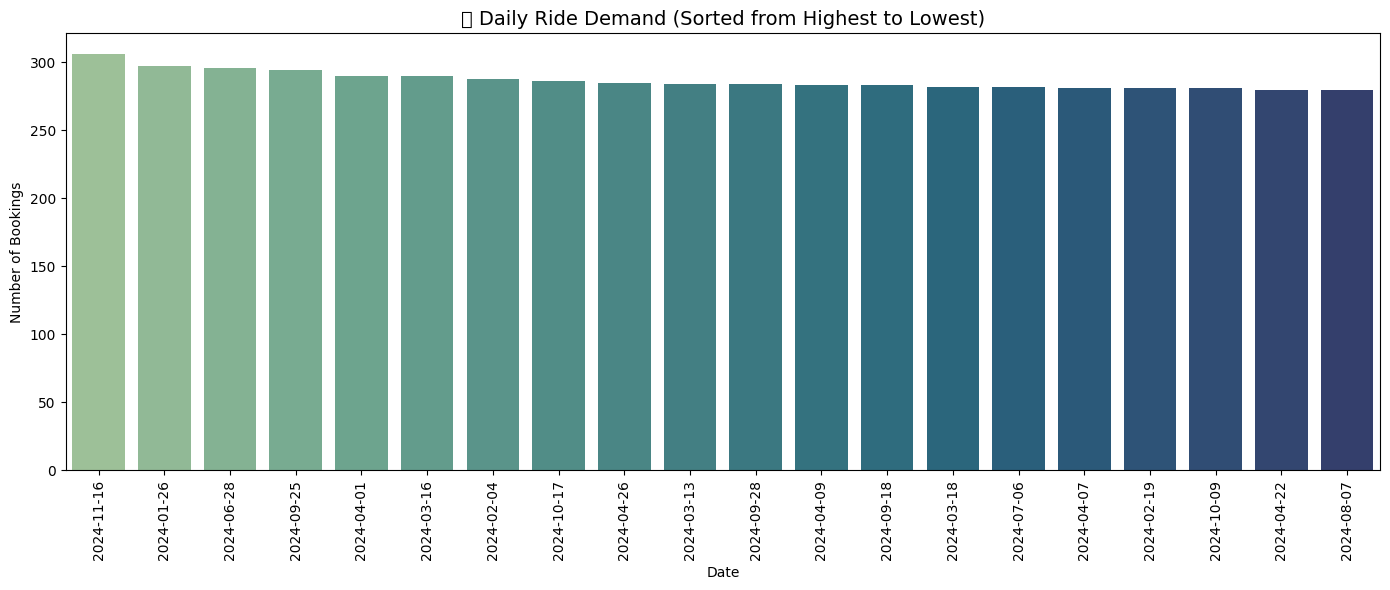

In [ ]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# daily_bookings = df.groupby(df['Date'].dt.date)['Booking Status'].count().reset_index()
daily_bookings = (
    df_cleaned[df_cleaned['Booking Status'] == 'Completed']
    .groupby(df_cleaned['Date'].dt.date)['Booking Status']
    .count()
    .reset_index()
)

print(daily_bookings.head())

daily_bookings = daily_bookings.sort_values(by='Booking Status', ascending=False).head(20)

# Display top 10 busiest dates
print("Top 10 Dates with Highest Ride Demand:")
print(daily_bookings.head(10))

# Plot all dates (descending order)
plt.figure(figsize=(14,6))
sns.barplot(data=daily_bookings, x='Date', y='Booking Status', palette='crest')
plt.title('📈 Daily Ride Demand (Sorted from Highest to Lowest)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Looking at the completed booking distribution on each date, as i thought, it's quite a lot of ride on one day. From looking at each date, we can summarize to each day.

/tmp/ipython-input-1384425033.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_bookings, x='Day', y='Booking Status', palette='crest')


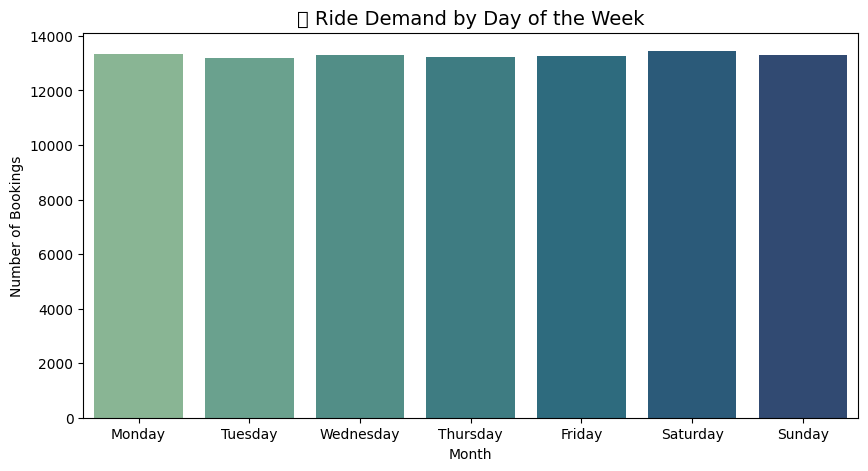

In [ ]:
df_cleaned['Day'] = df_cleaned['Date'].dt.day_name()

day_bookings = (
    df_cleaned[df_cleaned['Booking Status'] == 'Completed']
    .groupby('Day')['Booking Status']
    .count()
    .reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ).reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(data=day_bookings, x='Day', y='Booking Status', palette='crest')
plt.title('📊 Ride Demand by Day of the Week', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

The chart shows that ride demand remains relatively consistent throughout the week, with only minor variations between days. Each day records approximately about 13,000 to 13,500 bookings, indicating a steady demand pattern without significant peaks or drops. This suggests that the ride-hailing service experiences balanced user activity on both weekdays and weekends

From a business perspective, this consistency implies that there are no extreme demand fluctuations, which can simplify driver scheduling and operational planning. However, even small differences may hint at patterns like weekday commuting or weekend leisure travel

/tmp/ipython-input-3433748516.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_bookings, x='Month', y='Booking Status', palette='crest')


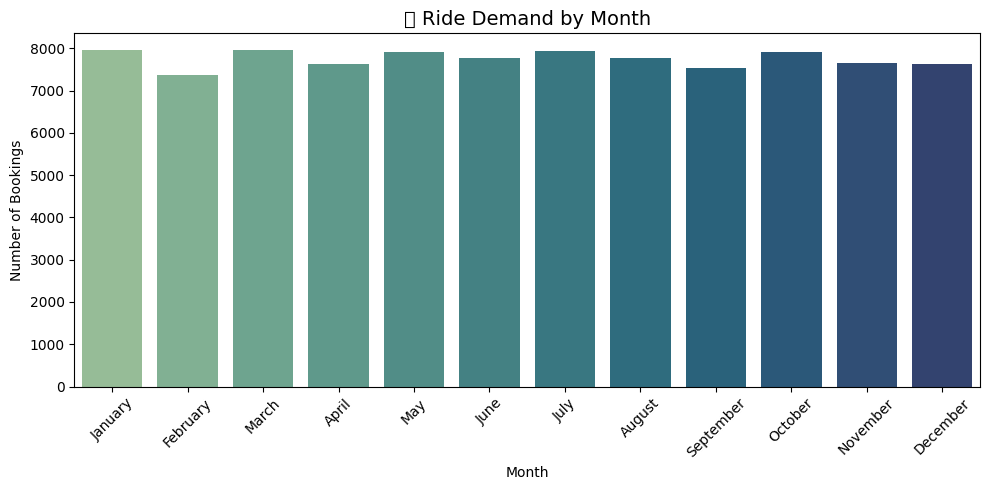

In [ ]:
df_cleaned['Month'] = df_cleaned['Date'].dt.month_name()

month_bookings = (
    df_cleaned[df_cleaned['Booking Status'] == 'Completed']
    .groupby('Month')['Booking Status']
    .count()
    .reindex(
        ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    ).reset_index()
)

plt.figure(figsize=(10, 5))
plt.title('📊 Ride Demand by Month', fontsize=14)
sns.barplot(data=month_bookings, x='Month', y='Booking Status', palette='crest')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

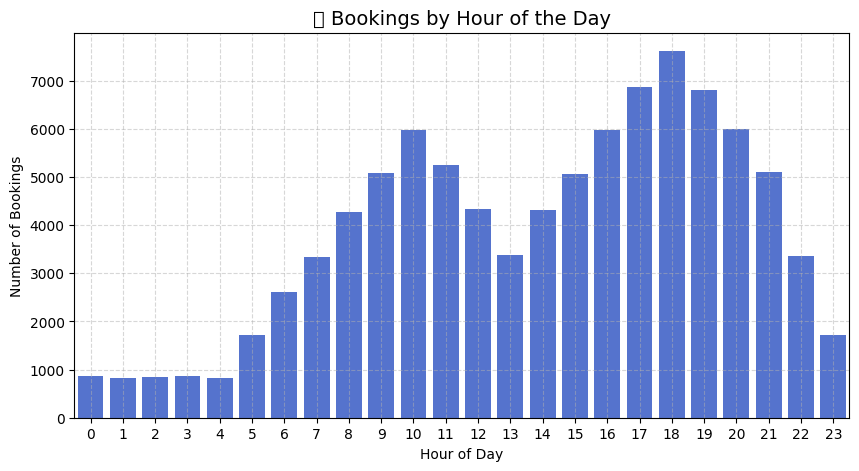

In [ ]:
# Convert 'Time' column to datetime (if not already)
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S', errors='coerce')

# Extract the hour
df_cleaned['Hour'] = df_cleaned['Time'].dt.hour

# Count bookings per hour
hourly_bookings = (
    df_cleaned[df_cleaned['Booking Status'] == 'Completed']
    .groupby('Hour')['Booking Status']
    .count()
    .reset_index()
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=hourly_bookings, x='Hour', y='Booking Status', color='royalblue')
plt.title('📊 Bookings by Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The pattern shows a clear variation in demand based on time of day. Bookings are lowest during the early morning hours (00:00–04:00), likely due to reduced travel activity at night. Starting from 5:00 AM, demand begins to rise sharply, reaching a moderate peak around 9:00–10:00 AM, which corresponds to typical morning commute hours. After a brief mid-day dip, bookings climb again in the late afternoon, peaking around 18.00 indicating the evening rush hour when many users are likely heading home from work or school. Following this peak, demand gradually declines through the night, especially after 10:00 PM.

From this 'Booking by Hour' graph, it's would be intuitive to see the distribution by grouping them into a few of ranges such as morning, afternoon, etc.

In [ ]:
# Convert the time from integer into category by timezone
def convertTimeRange(Hour):
    if Hour >= 5 and Hour <= 12:
        return 'Morning'
    elif Hour > 12 and Hour <= 17:
        return 'Afternoon'
    elif Hour >= 18 and Hour<= 24:
        return 'Evenings'
    elif Hour >= 0 and Hour < 5:
        return 'LateNights'

In [ ]:
df_cleaned['Time Range'] = df_cleaned['Hour'].apply(convertTimeRange)
df_cleaned.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Customer Rating,Payment Method,Is_Completed,Is_Incomplete,Is_Cancelled,Is_NoDriver,Day,Month,Hour,Time Range
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,Not Applicable,False,False,False,True,Saturday,March,12,Morning
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,UPI,False,True,False,False,Friday,November,18,Evenings
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,4.9,Debit Card,True,False,False,False,Friday,August,8,Morning
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,5.0,UPI,True,False,False,False,Monday,October,17,Afternoon
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,4.3,UPI,True,False,False,False,Monday,September,22,Evenings


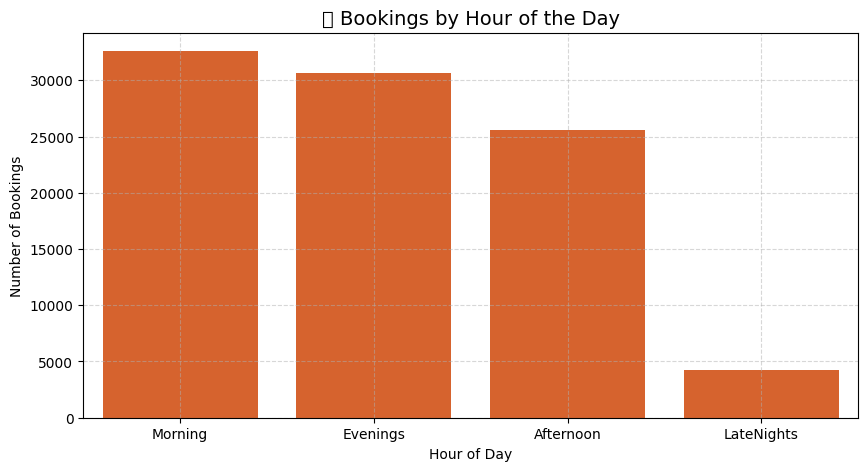

In [ ]:
# Count bookings per hour
hourly_bookings = (
    df_cleaned[df_cleaned['Booking Status'] == 'Completed']
    .groupby('Time Range')['Booking Status']
    .count()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=hourly_bookings, x='Time Range', y='Booking Status', color='#F25912')
plt.title('📊 Bookings by Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The chart above shows that ride demand peaks in the morning, followed closely by the evening, indicating high activity during typical commute hours. The afternoon sees moderate demand, likely from non-commute trips, while late-night bookings are significantly lower due to reduced travel activity. These patterns highlight that morning and evening are the most critical periods for optimizing driver availability and dynamic pricing, whereas afternoon and late-night hours could benefit from targeted promotions to increase utilization.

Similar to distribution visualization based on hour, we can see the ride happens most at the morning and the evening, usually when rush hour.

---

**Which pickup and drop locations have the highest ride demand?**

After analyzing the distribution of ride based on time, we can move to analyze the distribution based on pickup and drop location.

In [ ]:
pickup_counts = df_cleaned[df_cleaned['Booking Status'] == 'Completed']['Pickup Location'].value_counts()
top_10 = pickup_counts.head(5)
least_10 = pickup_counts.tail(5).sort_values(ascending=True)

# Show the most and the least pickup location
print("Top 10 location", top_10)
print()
print("Least 10 location", least_10)

Top 10 location Pickup Location
Khandsa            600
Barakhamba Road    594
Subhash Chowk      582
Madipur            579
Mehrauli           574
Name: count, dtype: int64

Least 10 location Pickup Location
Vinobapuri      450
Akshardham      471
Chhatarpur      482
Chirag Delhi    486
Arjangarh       486
Name: count, dtype: int64


/tmp/ipython-input-3383558314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pickups, y='Pickup Location', x='Number of Bookings', palette='magma')


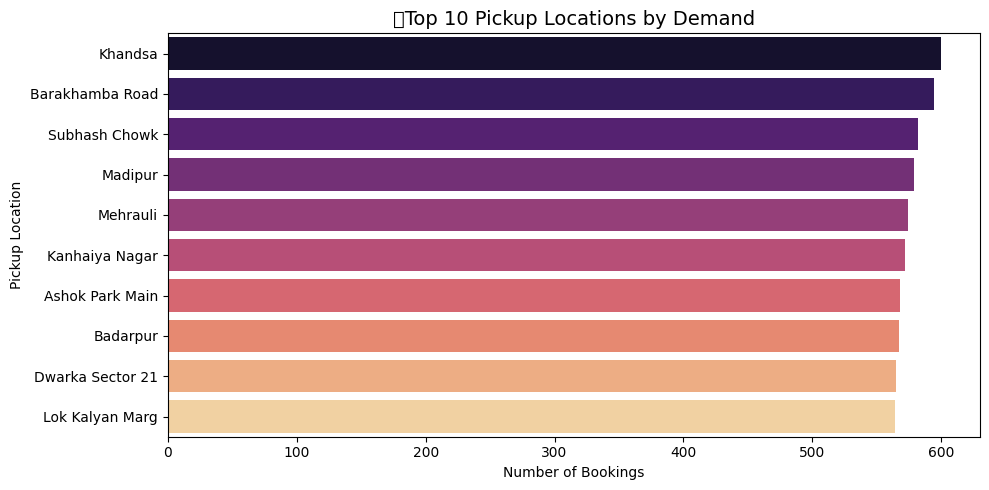

In [ ]:
top_pickups = df_cleaned[df_cleaned['Booking Status'] == 'Completed']['Pickup Location'].value_counts().head(10).reset_index()
top_pickups.columns = ['Pickup Location', 'Number of Bookings']

plt.figure(figsize=(10,5))
sns.barplot(data=top_pickups, y='Pickup Location', x='Number of Bookings', palette='magma')
plt.title('📍Top 10 Pickup Locations by Demand', fontsize=14)
plt.xlabel('Number of Bookings')
plt.ylabel('Pickup Location')
plt.tight_layout()
plt.show()

The data reveals that Khandsa holds the top spot as the most in-demand pickup area, closely followed by Barakhamba Road, Subhash Chowk, and Madipur. These locations likely represent major commercial or transit hubs where commuter activity is concentrated. Meanwhile, areas such as Dwarka Sector 21 and Lok Kalyan Marg also show relatively high demand but at a slightly lower level compared to the top-tier zones.

In [ ]:
drop_counts = df_cleaned[df_cleaned['Booking Status'] == 'Completed']['Drop Location'].value_counts()
top_10 = drop_counts.head(5)
least_10 = drop_counts.tail(5).sort_values(ascending=True)

# Show the most and the least pickup location
print("Top 10 location", top_10)
print()
print("Least 10 location", least_10)

Top 10 location Drop Location
Ashram             592
Preet Vihar        589
Sultanpur          584
Noida Extension    579
Dwarka Mor         574
Name: count, dtype: int64

Least 10 location Drop Location
Vasant Kunj          464
Huda City Centre     469
Badshahpur           478
Gurgaon Sector 29    479
Shivaji Park         480
Name: count, dtype: int64


/tmp/ipython-input-2072968069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drops, y='Drop Location', x='Number of Bookings', palette='plasma')


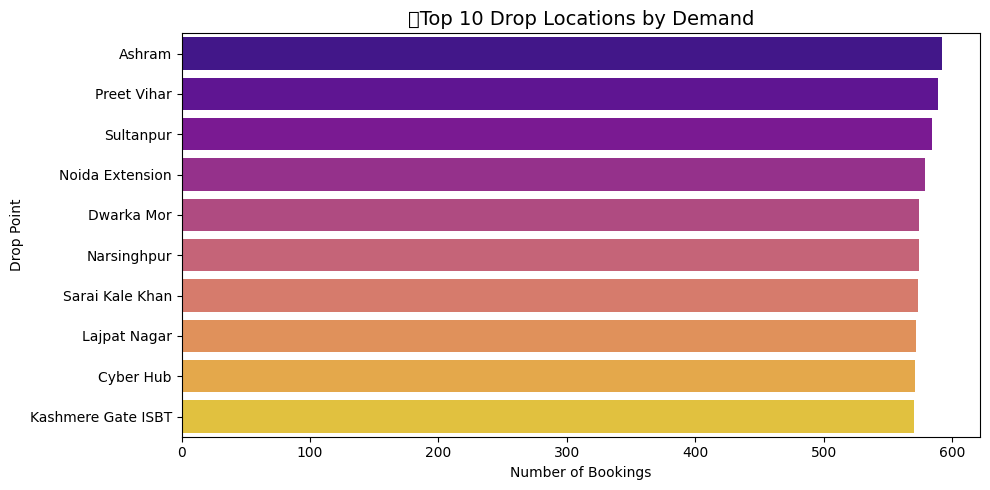

In [ ]:
top_drops = df_cleaned[df_cleaned['Booking Status'] == 'Completed']['Drop Location'].value_counts().head(10).reset_index()
top_drops.columns = ['Drop Location', 'Number of Bookings']

plt.figure(figsize=(10,5))
sns.barplot(data=top_drops, y='Drop Location', x='Number of Bookings', palette='plasma')
plt.title('🎯Top 10 Drop Locations by Demand', fontsize=14)
plt.xlabel('Number of Bookings')
plt.ylabel('Drop Point')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2805577639.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


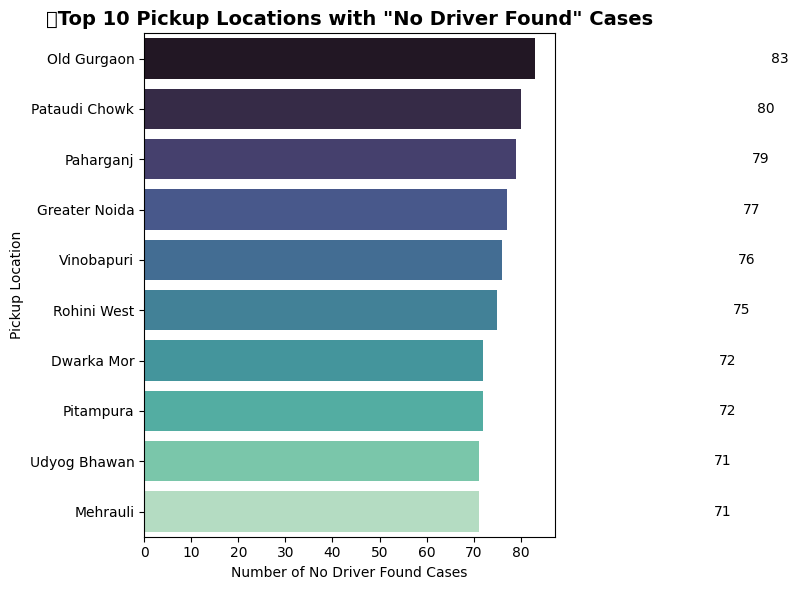

In [ ]:
no_driver_count = df_cleaned[df_cleaned['Booking Status'] == 'No Driver Found']

no_driver_locations = (
    no_driver_count['Pickup Location']
    .value_counts()
    .head(10)
    .reset_index()
)
no_driver_locations.columns = ['Pickup Location', 'Count']


plt.figure(figsize=(10,6))
sns.barplot(
    data=no_driver_locations,
    y='Pickup Location',
    x='Count',
    palette='mako'
)

plt.title('📍Top 10 Pickup Locations with "No Driver Found" Cases', fontsize=14, weight='bold')
plt.xlabel('Number of No Driver Found Cases')
plt.ylabel('Pickup Location')

# Add count labels
for index, value in enumerate(no_driver_locations['Count']):
    plt.text(value + 50, index, f'{value:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

From this analysis, we can see that Old Gurgaon ranks first with 83 cases, followed closely by Pataudi Chowk (80 cases) and Paharganj (79 cases). Other notable areas include Greater Noida (77), Vinobapuri (76), and Rohini West (75), while Dwarka Mor, Pitampura, Udyog Bhawan, and Mehrauli each record between 71 and 72 cases.

This distribution suggests that the issue of unavailable drivers is concentrated in several pickup zones.

---

**Which vehicle types are most in demand (Bike, Auto, Sedan, etc.)?**

Beside demand based on time and locations, we should see customer demands based on vehicle type. We should do this suppose the preference of vehicle of each customer. Also, customer also consider the comfortability of vehicle provided.

In [ ]:
vehicle_demand = df_cleaned.groupby('Vehicle Type')['Booking Status'].count().reset_index()
vehicle_demand

,Vehicle Type,Booking Status
0,Auto,37419
1,Bike,22517
2,Go Mini,29806
3,Go Sedan,27141
4,Premier Sedan,18111
5,Uber XL,4449
6,eBike,10557


/tmp/ipython-input-3994054331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_demand, x='Vehicle Type', y='Number of Bookings', palette='cool')


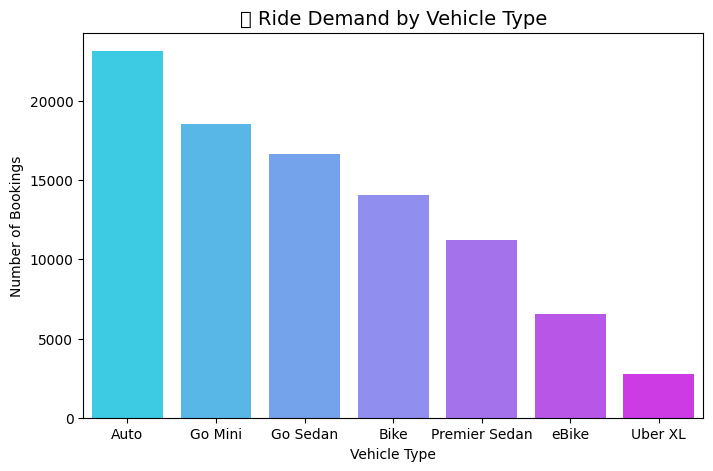

In [ ]:
# Count bookings by vehicle type
vehicle_demand = df_cleaned[df_cleaned['Booking Status'] == 'Completed']['Vehicle Type'].value_counts().reset_index()
vehicle_demand.columns = ['Vehicle Type', 'Number of Bookings']

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=vehicle_demand, x='Vehicle Type', y='Number of Bookings', palette='cool')
plt.title('🚗 Ride Demand by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Bookings')
plt.show()


Where are the location with the most 'no driver found' case

From the provided visualization of number of bookings based on vehicle type, we can conclude the most of succesful ride occured with 'Auto' vehicle type. The top three from the list, as we can see, are Auto, Go Mini, and Go Sedan.

---

### Operational Eficiency

**Operational Efficiency**

How efficient are ride operations in terms of cancellations, wait times, and incomplete rides?

What to know?
* How is the successful ride among the unsuccessful?
* How often do cancellations occur (by drivers vs. customers)?
* What are the top reasons for cancellations, and when do they happen most?
* How long is the average wait time (VTAT: Vehicle Turnaround Time) and customer wait time (CTAT)? => Can be affected by traffic jam, etc.
* How many rides end as “Incomplete” and why?

**How is the successful ride among the unsuccessful?**

Total Rides: 150000
Successful Rides: 93000
Successful Rate: 62.00%

📊 Ride Status Summary (%):
Completed: 62.00%
Cancelled by Driver: 18.00%
No Driver Found: 7.00%
Cancelled by Customer: 7.00%
Incomplete: 6.00%


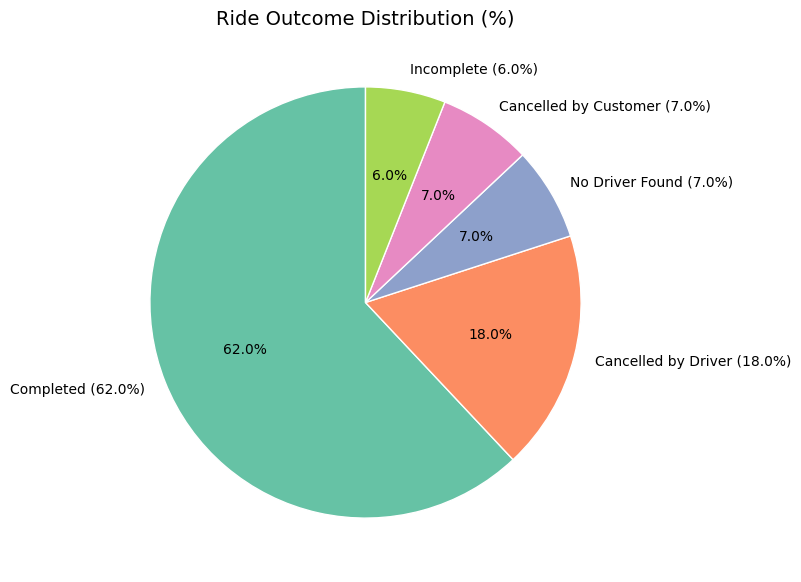

In [ ]:
# Succesful Rate
total_rides = len(df_cleaned)
successful_rides = len(df_cleaned[df_cleaned['Booking Status'] == 'Completed'])
successful_rate = (successful_rides / total_rides) * 100

print(f"Total Rides: {total_rides}")
print(f"Successful Rides: {successful_rides}")
print(f"Successful Rate: {successful_rate:.2f}%")

print("\n📊 Ride Status Summary (%):")
status_counts = df_cleaned['Booking Status'].value_counts()
status_percent = (status_counts / len(df_cleaned)) * 100

for status, pct in status_percent.items():
    print(f"{status}: {pct:.2f}%")

# Pie chart visualization
plt.figure(figsize=(7,7))
plt.pie(
    status_percent.values,
    labels=[f"{label} ({pct:.1f}%)" for label, pct in zip(status_percent.index, status_percent.values)],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2", len(status_percent)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title("Ride Outcome Distribution (%)", fontsize=14)
plt.show()


The majority of rides, 62%, were successfully completed, indicating good overall service performance and driver availability. However, 18% of rides were cancelled by drivers, which may suggest issues such as long pickup distances or driver dissatisfaction. Additionally, 7% of rides resulted in no driver found, highlighting potential mismatches between ride demand and driver supply. Another 7% were cancelled by customers, possibly due to long wait times or changes in plans, while the remaining 6% were incomplete, likely caused by technical errors or unfinished trips.

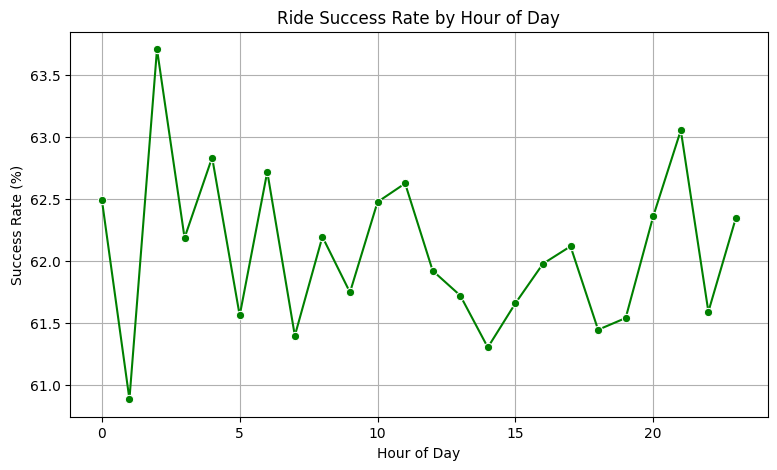

In [ ]:
success_by_hour = df_cleaned.groupby(['Hour', 'Booking Status']).size().reset_index(name='Count')

success_pivot = success_by_hour.pivot(index='Hour', columns='Booking Status', values='Count').fillna(0)
success_pivot['Success Rate (%)'] = success_pivot['Completed'] / success_pivot.sum(axis=1) * 100

plt.figure(figsize=(9,5))
sns.lineplot(data=success_pivot, x=success_pivot.index, y='Success Rate (%)', marker='o', color='green')
plt.title("Ride Success Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Success Rate (%)")
plt.grid(True)
plt.show()

Looking at the line chart that visualize the successful ride rate in one day, it would be insightful to combine it with succesful ride analysis from the previous point. Thus, we can find the success rate with the appropriate success ride counts.

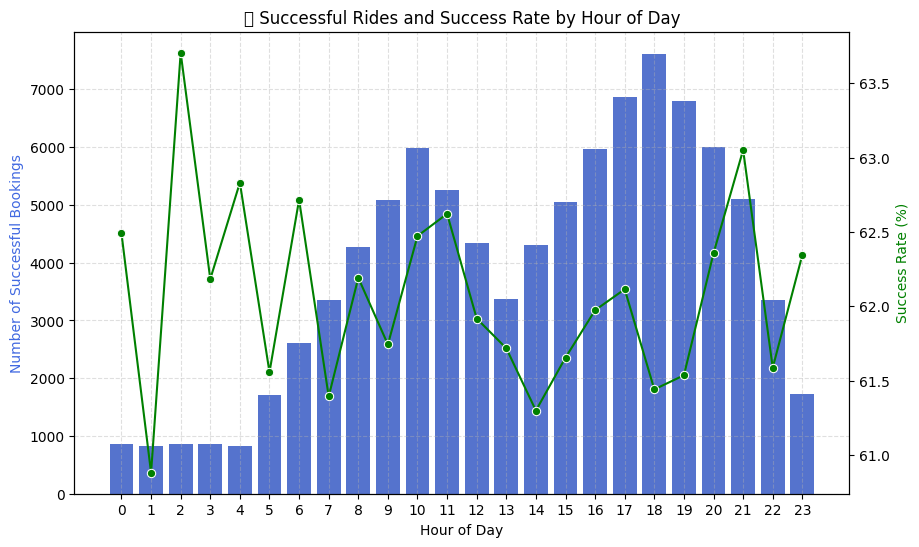

In [ ]:
# --- Successful Rides per Hour ---
hourly_bookings = (
    df_cleaned[df_cleaned['Booking Status'] == 'Completed']
    .groupby('Hour')['Booking Status']
    .count()
    .reset_index()
    .rename(columns={'Booking Status': 'Successful Bookings'})
)

# --- ANALYSIS 2: Success Rate per Hour ---
# Count all bookings by hour and status
success_by_hour = (
    df_cleaned.groupby(['Hour', 'Booking Status'])
    .size()
    .reset_index(name='Count')
)

# Pivot to get all statuses as columns
success_pivot = success_by_hour.pivot(index='Hour', columns='Booking Status', values='Count').fillna(0)

# Compute success rate
if 'Completed' in success_pivot.columns:
    success_pivot['Success Rate (%)'] = success_pivot['Completed'] / success_pivot.sum(axis=1) * 100
else:
    success_pivot['Success Rate (%)'] = 0  # Handle missing column

# Merge with successful bookings count
merged_df = pd.merge(hourly_bookings, success_pivot[['Success Rate (%)']], on='Hour', how='outer').fillna(0)

# --- VISUALIZATION ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Barplot: Successful Bookings
sns.barplot(data=merged_df, x='Hour', y='Successful Bookings', color='royalblue', ax=ax1)
ax1.set_ylabel('Number of Successful Bookings', color='royalblue')
ax1.set_xlabel('Hour of Day')
ax1.set_title('📊 Successful Rides and Success Rate by Hour of Day')
ax1.grid(True, linestyle='--', alpha=0.4)

# Lineplot: Success Rate
ax2 = ax1.twinx()
sns.lineplot(data=merged_df, x='Hour', y='Success Rate (%)', color='green', marker='o', ax=ax2)
ax2.set_ylabel('Success Rate (%)', color='green')

plt.show()


---

**How often do cancellations occur (by drivers vs. customers)?**

Cancellation Distribution:

Cancelled by Driver Rate: 18.00%
Cancelled by Customer Rate: 7.00%



/tmp/ipython-input-2879800308.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_comparison, x='Category', y='Count', palette='viridis')


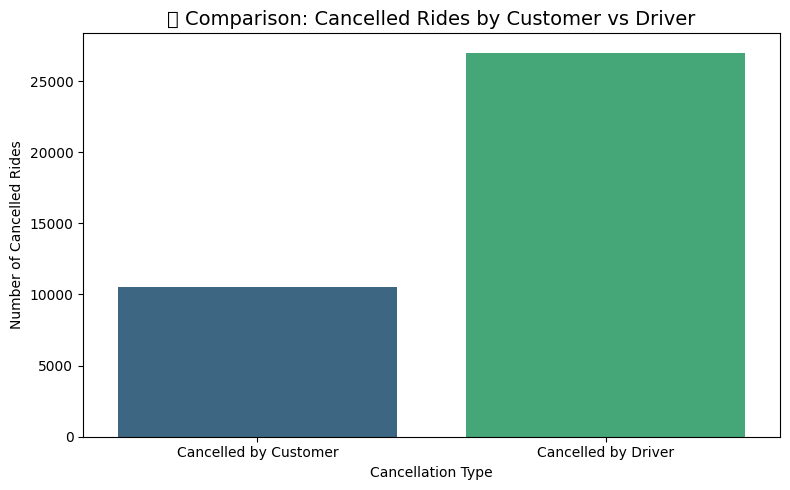

In [ ]:
print("Cancellation Distribution:")
print()

driver_cancellation = df_cleaned['Cancelled Rides by Driver'].sum()
driver_cancellation_rate = driver_cancellation / total_rides * 100
print(f"Cancelled by Driver Rate: {driver_cancellation_rate:.2f}%")

customer_cancellation = df_cleaned['Cancelled Rides by Customer'].sum()
customer_cancellation_rate = customer_cancellation / total_rides * 100
print(f"Cancelled by Customer Rate: {customer_cancellation_rate:.2f}%")
print()

cancel_comparison = pd.DataFrame({
    'Category': ['Cancelled by Customer', 'Cancelled by Driver'],
    'Count': [
        df_cleaned['Cancelled Rides by Customer'].sum(),
        df_cleaned['Cancelled Rides by Driver'].sum()
    ]
})

# Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(data=cancel_comparison, x='Category', y='Count', palette='viridis')
plt.title('🚫 Comparison: Cancelled Rides by Customer vs Driver', fontsize=14)
plt.xlabel('Cancellation Type')
plt.ylabel('Number of Cancelled Rides')
plt.tight_layout()
plt.show()

It is evident that drivers cancel significantly more rides compared to customers. Specifically, the number of rides cancelled by drivers is around 27,000, which is more than double the approximately 10,000 rides cancelled by customers. This imbalance indicates that driver-related cancellations are a major contributor to overall ride disruptions. Such a high cancellation rate from drivers may stem from factors like long pickup distances, traffic conditions, or dissatisfaction with trip details.

 Daily Cancellation Distribution


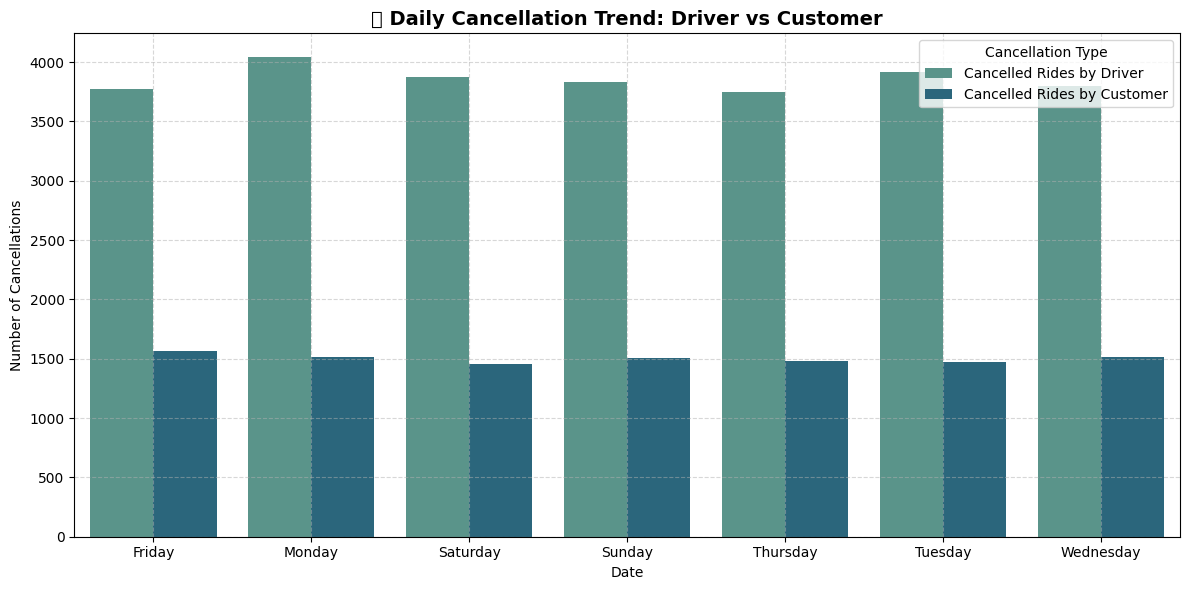

In [ ]:
print(' Daily Cancellation Distribution')

daily_cancellation = (
    df_cleaned.groupby('Day')[['Cancelled Rides by Driver', 'Cancelled Rides by Customer']]
    .sum()
    .reset_index()
)

daily_cancel_melt = daily_cancellation.melt(
    id_vars='Day',
    value_vars=['Cancelled Rides by Driver', 'Cancelled Rides by Customer'],
    var_name='Cancellation Type',
    value_name='Count'
)

# --- Visualization ---
plt.figure(figsize=(12,6))
sns.barplot(
    data = daily_cancel_melt,
    x='Day',
    y='Count',
    hue='Cancellation Type',
    palette='crest'
)

plt.title('🚫 Daily Cancellation Trend: Driver vs Customer', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.legend(title='Cancellation Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**What are the top reasons for cancellations, and when do they happen most?**

/tmp/ipython-input-1110207420.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


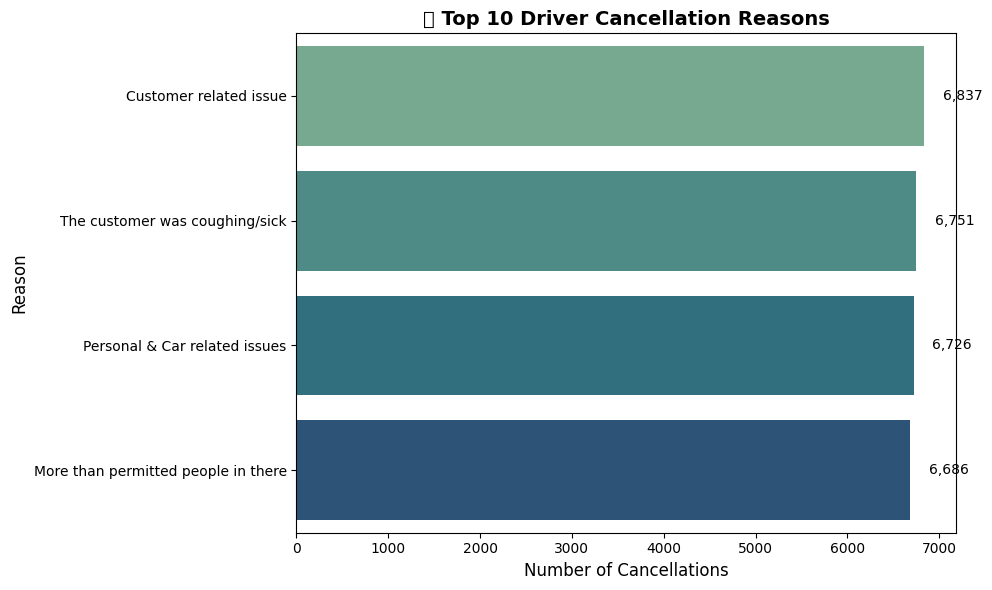

In [ ]:
top_cancel = (
    df_cleaned[df_cleaned['Driver Cancellation Reason'] != 'Not Applicable']
    ['Driver Cancellation Reason']
    .value_counts()
    .head(10)
    .reset_index()
)

top_cancel.columns = ['Reason', 'Number of Cancellations']

# Create horizontal bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_cancel,
    y='Reason',
    x='Number of Cancellations',
    palette='crest'
)

# Add title and labels
plt.title('🚫 Top 10 Driver Cancellation Reasons', fontsize=14, weight='bold')
plt.xlabel('Number of Cancellations', fontsize=12)
plt.ylabel('Reason', fontsize=12)

# Add count labels beside bars
for index, value in enumerate(top_cancel['Number of Cancellations']):
    plt.text(value + 200, index, f'{value:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

The highest count of reason why driver cancelled is customer related issue.

/tmp/ipython-input-2707715704.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


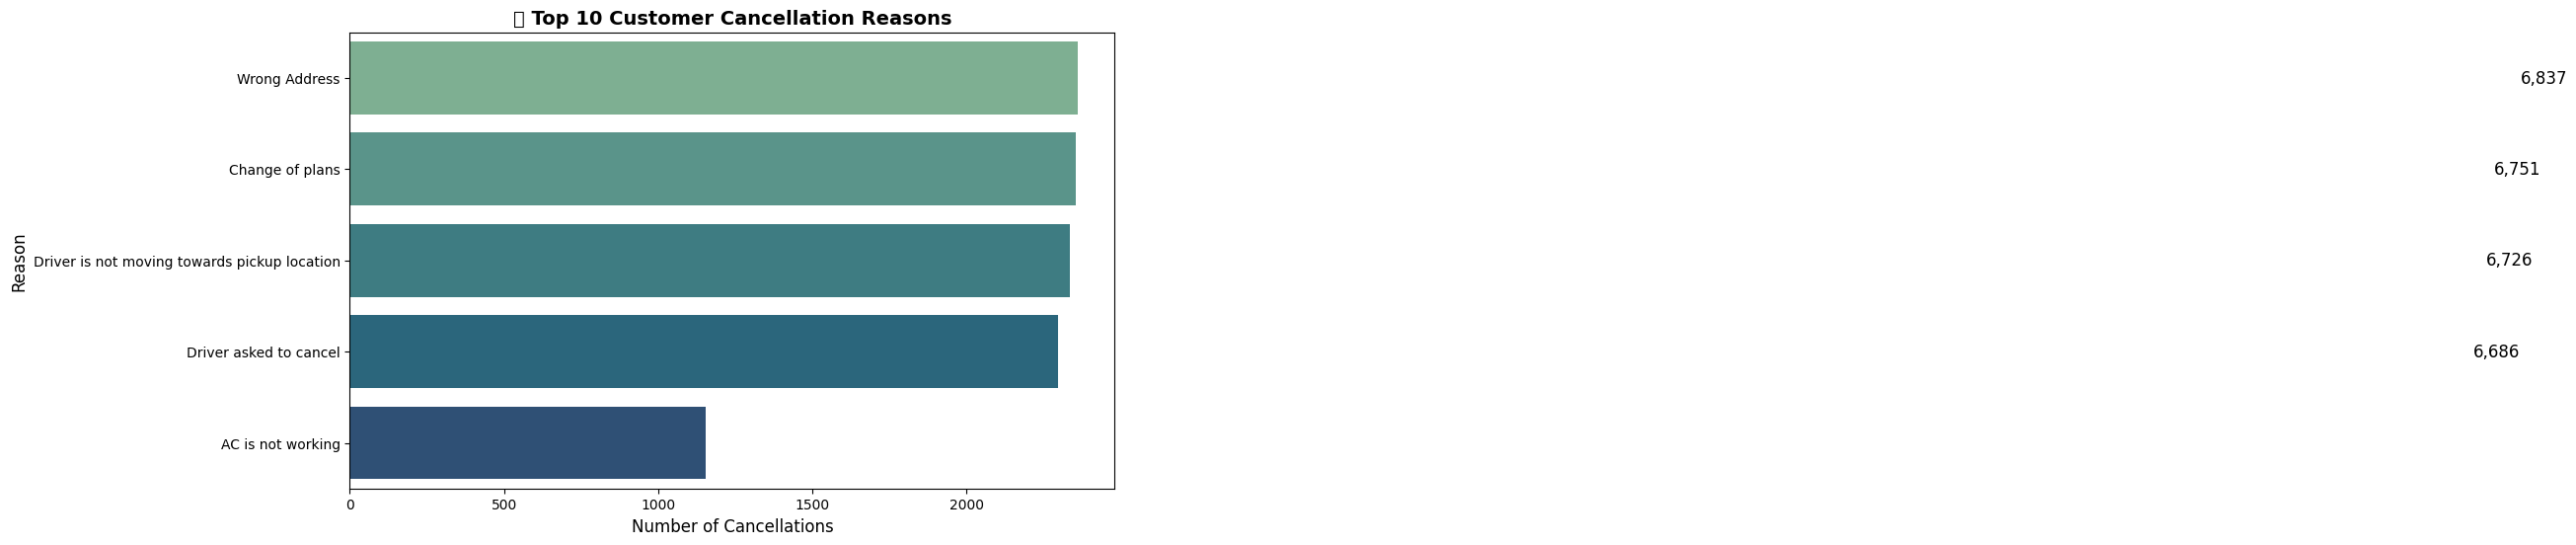

In [ ]:
top_cust_cancel = (
    df_cleaned[df_cleaned['Reason for cancelling by Customer'] != 'Not Applicable']
    ['Reason for cancelling by Customer']
    .value_counts()
    .head(10)
    .reset_index()
)

top_cust_cancel.columns = ['Reason', 'Number of Cancellations']

# Create horizontal bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_cust_cancel,
    y='Reason',
    x='Number of Cancellations',
    palette='crest'
)

# Add title and labels
plt.title('🚫 Top 10 Customer Cancellation Reasons', fontsize=14, weight='bold')
plt.xlabel('Number of Cancellations', fontsize=12)
plt.ylabel('Reason', fontsize=12)

# Add count labels beside bars
for index, value in enumerate(top_cancel['Number of Cancellations']):
    plt.text(value + 200, index, f'{value:,}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

**How long is the average wait time (VTAT: Vehicle Turnaround Time) and customer wait time (CTAT)?**

In [ ]:
# Average VTAT and CTAT
# --- Summary statistics ---
wait_time_df = df_cleaned[['Avg VTAT', 'Avg CTAT']]
avg_vtat = wait_time_df['Avg VTAT'].mean()
avg_ctat = wait_time_df['Avg CTAT'].mean()

print("📊 Average Wait Time Analysis:")
print(f"Average Vehicle Turnaround Time (VTAT): {avg_vtat:.2f} minutes")
print(f"Average Customer Wait Time (CTAT): {avg_ctat:.2f} minutes")

📊 Average Wait Time Analysis:
Average Vehicle Turnaround Time (VTAT): 8.46 minutes
Average Customer Wait Time (CTAT): 29.15 minutes


/tmp/ipython-input-4260132121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


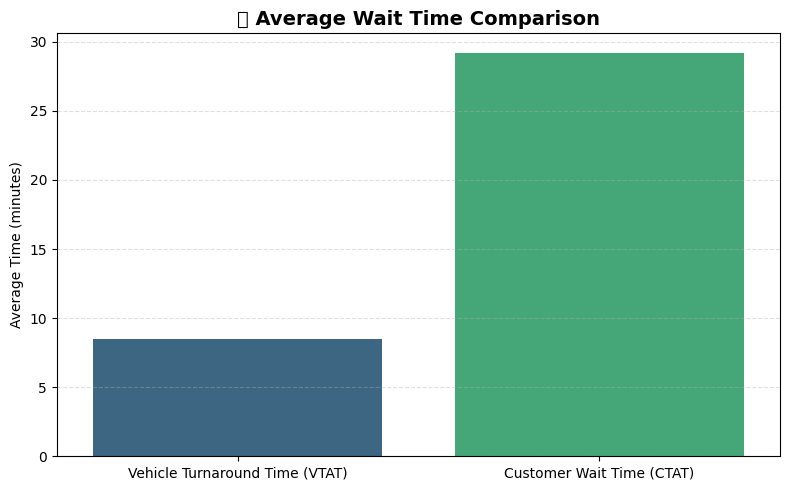

In [ ]:
# --- Visualization ---
plt.figure(figsize=(8,5))
sns.barplot(
    x=['Vehicle Turnaround Time (VTAT)', 'Customer Wait Time (CTAT)'],
    y=[avg_vtat, avg_ctat],
    palette='viridis'
)

plt.title('⏱️ Average Wait Time Comparison', fontsize=14, weight='bold')
plt.ylabel('Average Time (minutes)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

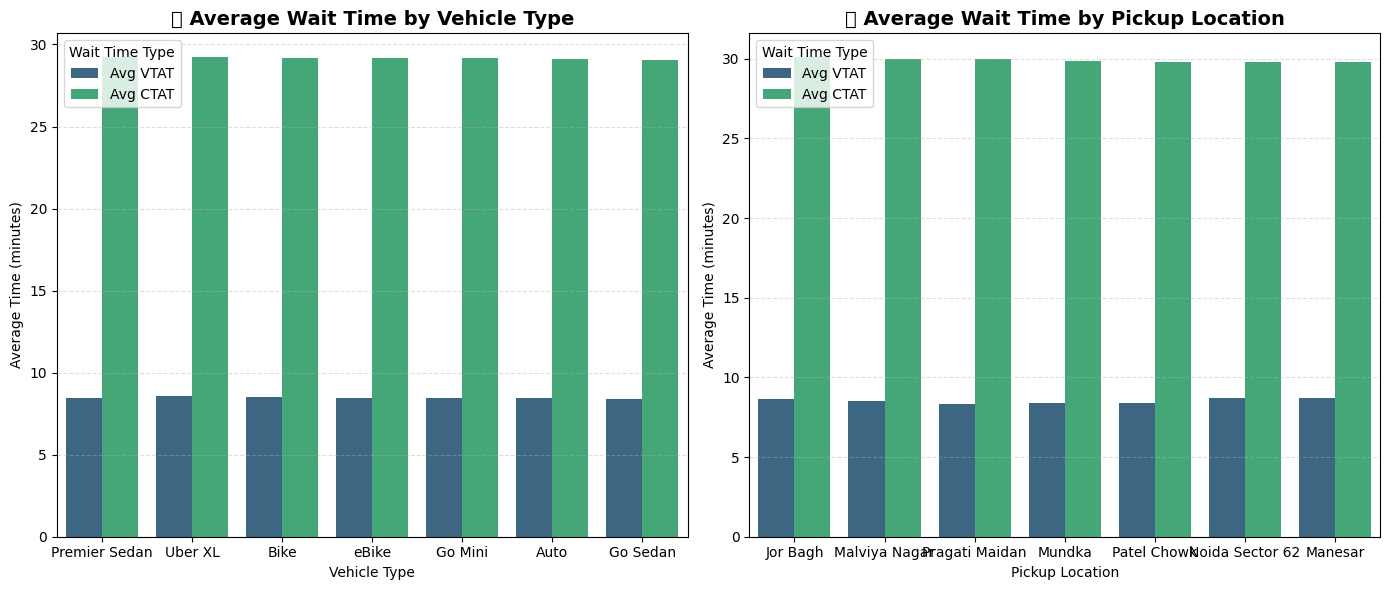

In [ ]:
vtat_ctat_vehicle = (
    df_cleaned.groupby('Vehicle Type')[['Avg VTAT', 'Avg CTAT']]
    .mean()
    .reset_index()
    .sort_values('Avg CTAT', ascending=False)
)

vtat_ctat_vehicle.head()

vtat_ctat_vehicle_melt = vtat_ctat_vehicle.melt(
    id_vars='Vehicle Type',
    value_vars=['Avg VTAT', 'Avg CTAT'],
    var_name='Wait Time Type',
    value_name='Average Time'
)

vtat_ctat_location = (
    df_cleaned.groupby('Pickup Location')[['Avg VTAT', 'Avg CTAT']]
    .mean()
    .reset_index()
    .sort_values('Avg CTAT', ascending=False).head(7)
)
vtat_ctat_location_melt = vtat_ctat_location.melt(
    id_vars='Pickup Location',
    value_vars=['Avg VTAT', 'Avg CTAT'],
    var_name='Wait Time Type',
    value_name='Average Time'
)

# --- Visualization ---
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# --- Vehicle Type Analysis ---
sns.barplot(
    data = vtat_ctat_vehicle_melt,
    x='Vehicle Type',
    y='Average Time',
    hue='Wait Time Type',
    palette='viridis',
    ax=ax[0]
)
ax[0].set_title('⏱️ Average Wait Time by Vehicle Type', fontsize=14, weight='bold')
ax[0].set_xlabel('Vehicle Type')
ax[0].set_ylabel('Average Time (minutes)')
ax[0].grid(axis='y', linestyle='--', alpha=0.4)

sns.barplot(
    data = vtat_ctat_location_melt,
    x='Pickup Location',
    y='Average Time',
    hue='Wait Time Type',
    palette='viridis',
    ax=ax[1]
)
ax[1].set_title('⏱️ Average Wait Time by Pickup Location', fontsize=14, weight='bold')
ax[1].set_xlabel('Pickup Location')
ax[1].set_ylabel('Average Time (minutes)')
ax[1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

---

**How many rides end as “Incomplete” and why?**

/tmp/ipython-input-1497386881.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


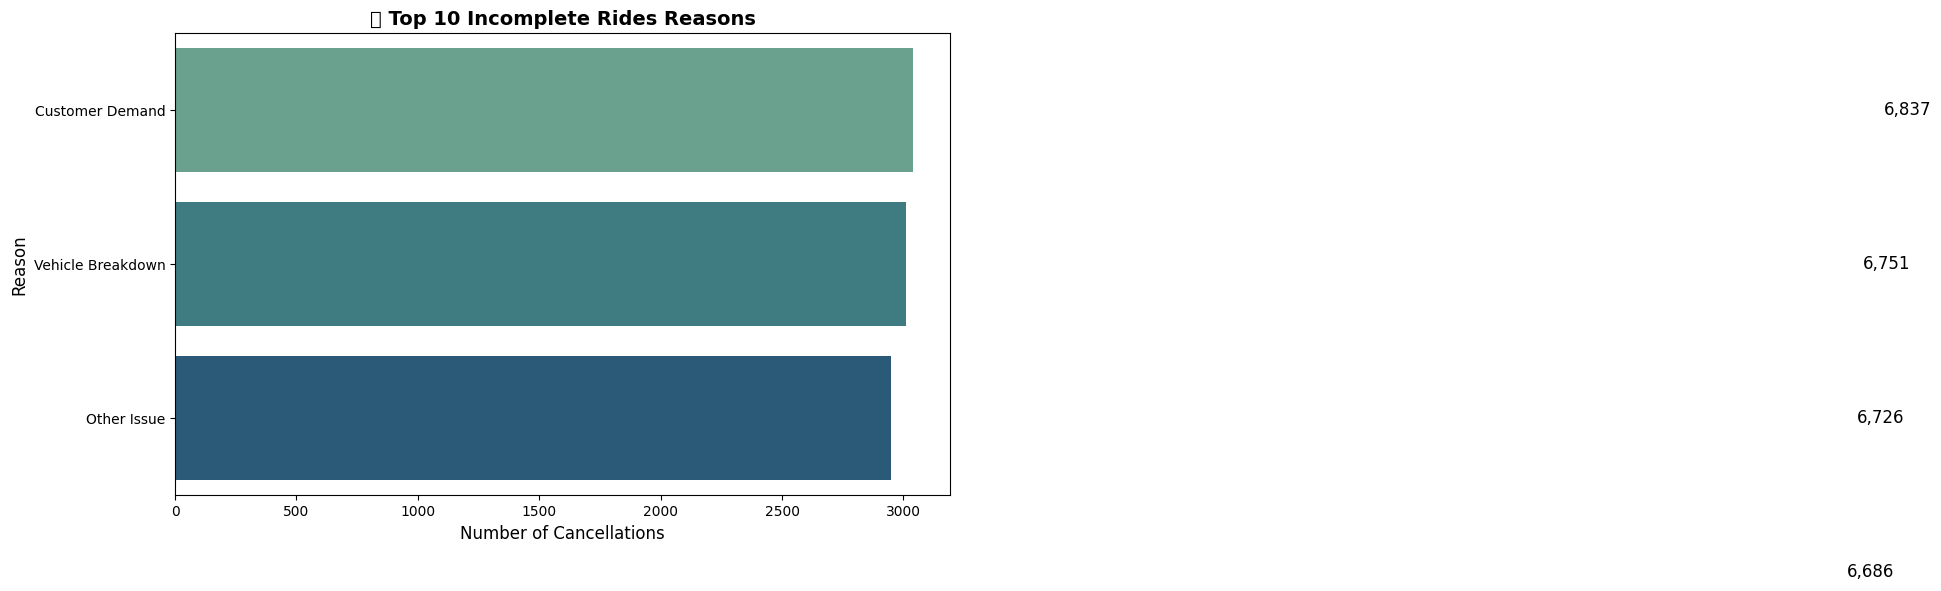

In [ ]:
top_incomplete = (
    df_cleaned[df_cleaned['Incomplete Rides Reason'] != 'Not Applicable']
    ['Incomplete Rides Reason']
    .value_counts()
    .head(10)
    .reset_index()
)

top_incomplete.columns = ['Reason', 'Number of Cancellations']

# Create horizontal bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_incomplete,
    y='Reason',
    x='Number of Cancellations',
    palette='crest'
)

# Add title and labels
plt.title('🚫 Top 10 Incomplete Rides Reasons', fontsize=14, weight='bold')
plt.xlabel('Number of Cancellations', fontsize=12)
plt.ylabel('Reason', fontsize=12)

# Add count labels beside bars
for index, value in enumerate(top_cancel['Number of Cancellations']):
    plt.text(value + 200, index, f'{value:,}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

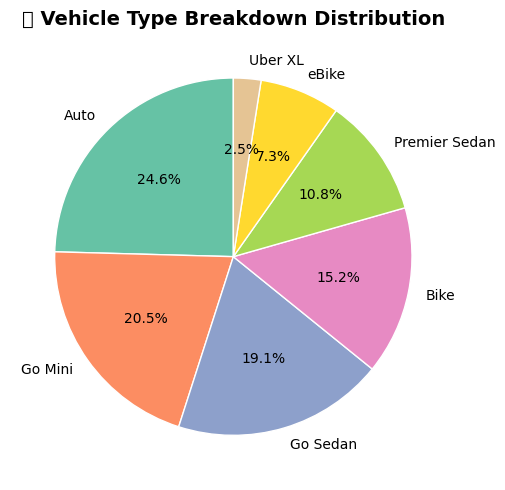

In [ ]:
vehicle_breakdown = df_cleaned[df_cleaned['Incomplete Rides Reason'] == 'Vehicle Breakdown']['Vehicle Type'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(
    vehicle_breakdown,
    labels=vehicle_breakdown.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2", len(vehicle_breakdown)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Add title
plt.title('🚗 Vehicle Type Breakdown Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

---

Incomplete reason, Incomplete with what vehicle, ride distance

WHEN DO CANCELLATIONS HAPPEN MOST

EDA about pickup and drop location (succesful vs others) in barplot. Or we can do succes / succes + incomplete.

---

### Gain Customer Insights

**Customer Insights**

What do customer behaviors and preferences (payment method, ratings, satisfaction) reveal about their experience?

What to know?
* Which payment methods are most commonly used (UPI, Debit Card, Cash, etc.)?
* How does customer rating compare with driver rating?
* Do high-value rides correlate with higher customer satisfaction?

**Which payment methods are most commonly used (UPI, Debit Card, Cash, etc.)?**

💳 Payment Method Usage (%):
Payment Method
Not Applicable    32.00
UPI               30.61
Cash              16.91
Uber Wallet        8.18
Credit Card        6.81
Debit Card         5.49
Name: proportion, dtype: float64


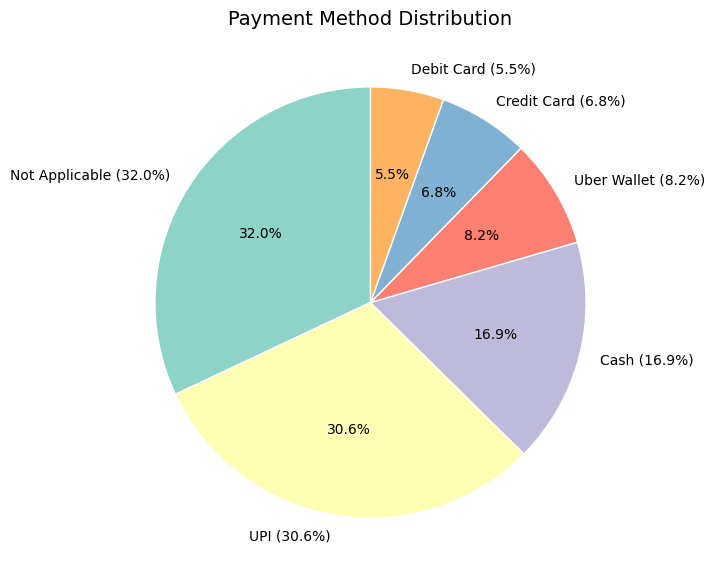

In [ ]:
payment_counts = df_cleaned['Payment Method'].value_counts(normalize=True) * 100

print("💳 Payment Method Usage (%):")
print(payment_counts.round(2))

plt.figure(figsize=(7,7))
plt.pie(
    payment_counts.values,
    labels=[f"{label} ({pct:.1f}%)" for label, pct in zip(payment_counts.index, payment_counts.values)],
    startangle=90,
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3", len(payment_counts)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title("Payment Method Distribution", fontsize=14)
plt.show()

---

**How does customer rating compare with driver rating?**

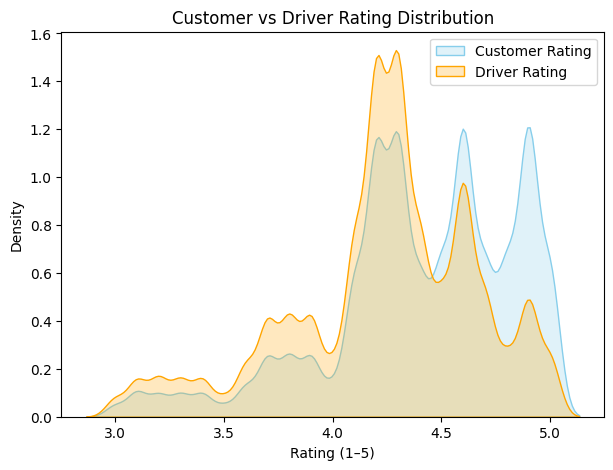

In [ ]:
# CUSTOMER RATING vs DRIVER RATING
plt.figure(figsize=(7,5))
sns.kdeplot(df_cleaned['Customer Rating'], label='Customer Rating', fill=True, color='skyblue')
sns.kdeplot(df_cleaned['Driver Ratings'], label='Driver Rating', fill=True, color='orange')
plt.title("Customer vs Driver Rating Distribution")
plt.xlabel("Rating (1–5)")
plt.ylabel("Density")
plt.legend()
plt.show()

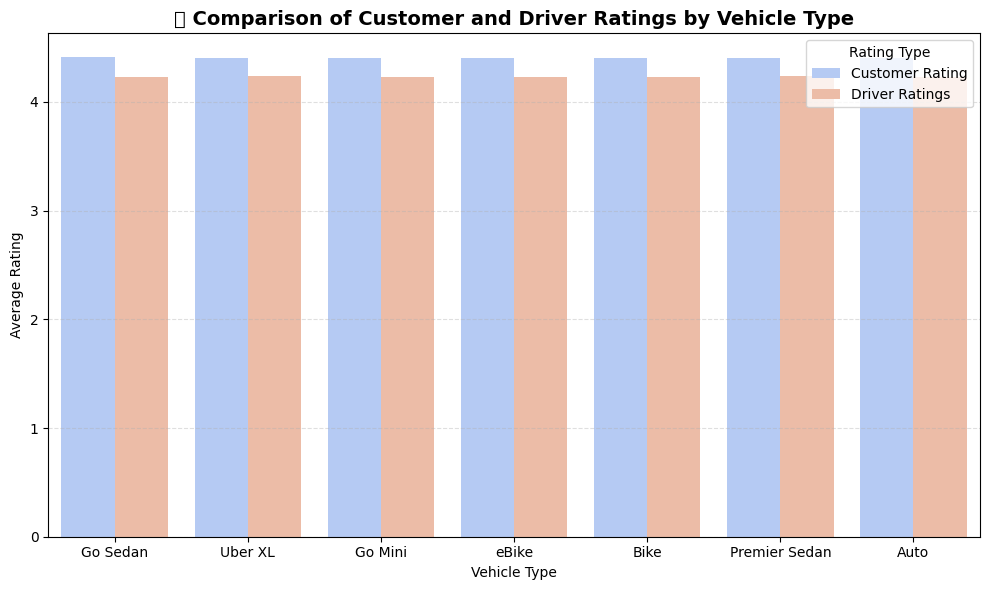

In [ ]:
rating_comparison = (
    df_cleaned.groupby('Vehicle Type')[['Customer Rating', 'Driver Ratings']]
    .mean()
    .reset_index()
    .sort_values('Customer Rating', ascending=False)
)

# Melt the dataframe for better visualization
rating_comparison_melt = rating_comparison.melt(
    id_vars='Vehicle Type',
    value_vars=['Customer Rating', 'Driver Ratings'],
    var_name='Rating Type',
    value_name='Average Rating'
)

# --- Visualization ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=rating_comparison_melt,
    x='Vehicle Type',
    y='Average Rating',
    hue='Rating Type',
    palette='coolwarm'
)

plt.title('⭐ Comparison of Customer and Driver Ratings by Vehicle Type', fontsize=14, weight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Rating')
plt.legend(title='Rating Type')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

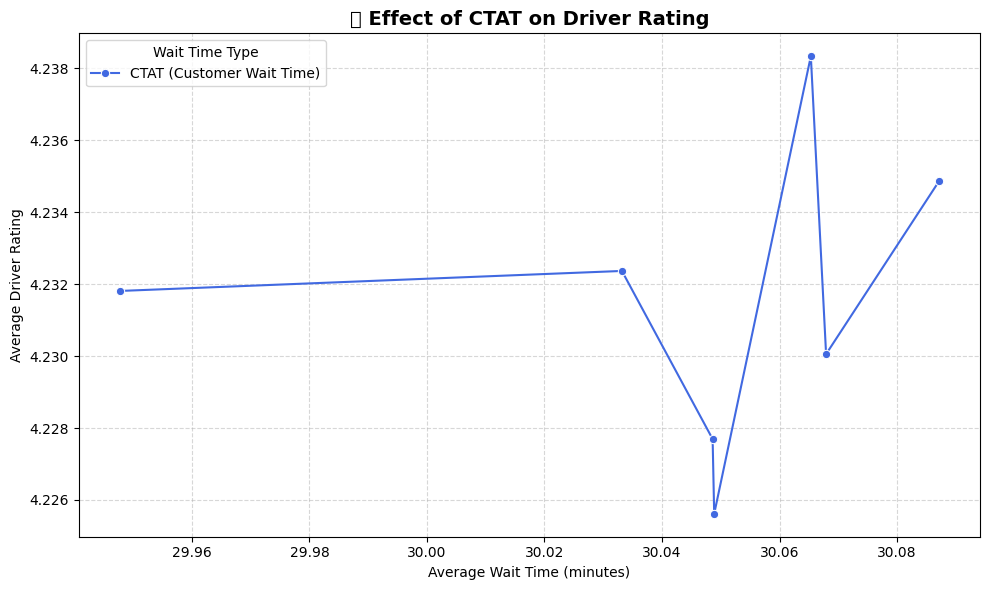

In [ ]:
completed_ride_df = df_cleaned[df_cleaned['Booking Status'] == 'Completed']
wait_rating = (
    completed_ride_df.groupby('Vehicle Type')[['Avg CTAT', 'Avg VTAT', 'Driver Ratings']]
    .mean()
    .reset_index()
)

# --- Visualization: Line plot comparison ---
plt.figure(figsize=(10,6))

# Plot CTAT vs Driver Rating
sns.lineplot(
    data=wait_rating,
    x='Avg CTAT',
    y='Driver Ratings',
    marker='o',
    label='CTAT (Customer Wait Time)',
    color='royalblue'
)

plt.title('📉 Effect of CTAT on Driver Rating', fontsize=14, weight='bold')
plt.xlabel('Average Wait Time (minutes)')
plt.ylabel('Average Driver Rating')
plt.legend(title='Wait Time Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---

**Do high-value rides correlate with higher customer satisfaction?**

💰 Using column Booking Value for ride value analysis.


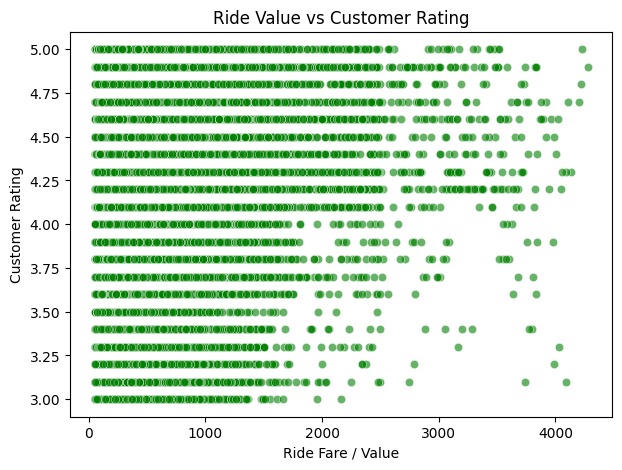

🔗 Correlation between Ride Value and Customer Rating: -0.00


/tmp/ipython-input-2635104496.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby('Booking Value Category')['Customer Rating']
/tmp/ipython-input-2635104496.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_by_fare, x='Booking Value Category', y='Customer Rating', palette='Greens_r')


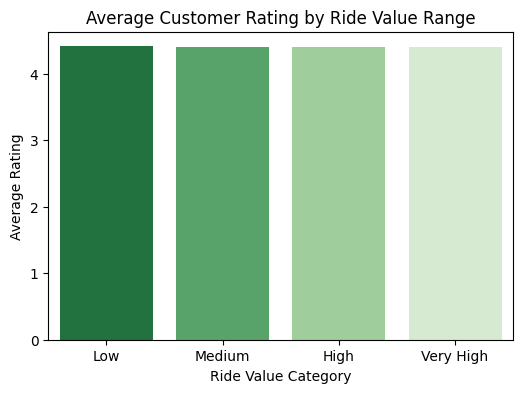

In [ ]:
print("💰 Using column Booking Value for ride value analysis.")

# --- Scatter plot: fare vs rating ---
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_cleaned, x='Booking Value', y='Customer Rating', alpha=0.6, color='green')
plt.title("Ride Value vs Customer Rating")
plt.xlabel("Ride Fare / Value")
plt.ylabel("Customer Rating")
plt.show()

# --- Correlation ---
corr_value_rating = df_cleaned[['Booking Value', 'Customer Rating']].corr().iloc[0,1]
print(f"🔗 Correlation between Ride Value and Customer Rating: {corr_value_rating:.2f}")

# --- Create a new binned column ---
df_cleaned['Booking Value Category'] = pd.qcut(
    df_cleaned['Booking Value'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

# --- Average rating by value range ---
avg_rating_by_fare = (
    df_cleaned.groupby('Booking Value Category')['Customer Rating']
    .mean()
    .reset_index()
)

# --- Bar plot ---
plt.figure(figsize=(6,4))
sns.barplot(data=avg_rating_by_fare, x='Booking Value Category', y='Customer Rating', palette='Greens_r')
plt.title("Average Customer Rating by Ride Value Range")
plt.ylabel("Average Rating")
plt.xlabel("Ride Value Category")
plt.show()

---

### Revenue & Growth

**Revenue & Growth**

Which factors (route, distance, vehicle type) drive the highest revenue and growth opportunities?

What to know?
* What is the distribution of booking values (revenue per ride)?
* Which routes/locations generate the highest revenue?
* How does ride distance affect booking value and cancellation rate?

**What is the distribution of booking values (revenue per ride)?**

Analyze the booking value depend of booking status (Completed vs Incomplete)

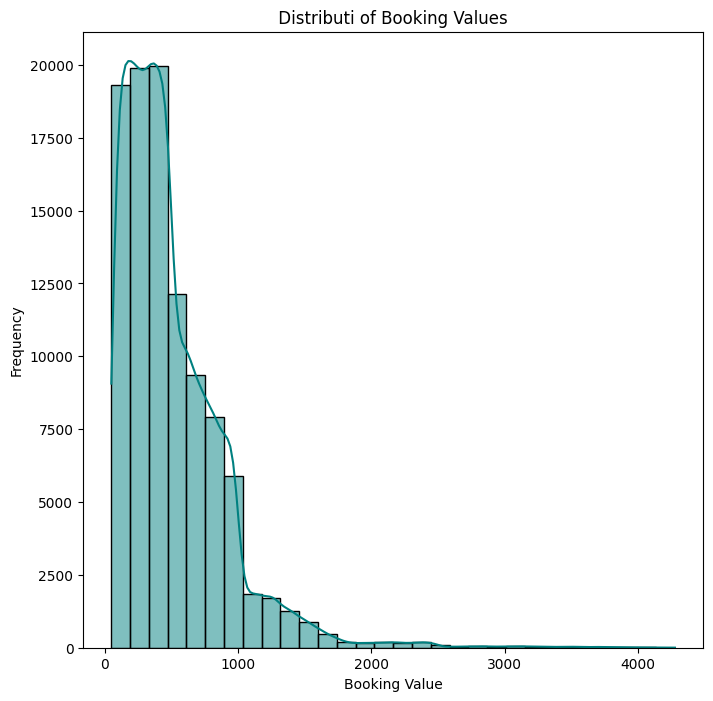

In [ ]:
# Display the Booking Value Column
plt.figure(figsize=(8,8))
sns.histplot(
    data=df_cleaned,
    x='Booking Value',
    bins=30,
    kde=True,
    color='teal'
)

plt.title(" Distributi of Booking Values ")
plt.xlabel("Booking Value")
plt.ylabel("Frequency")
plt.show()

💰 Average Booking Value per Vehicle Type:
     Vehicle Type Booking Status  Average Booking Value
0            Auto      Completed             506.483049
1            Auto     Incomplete             509.206637
2            Bike      Completed             509.114508
3            Bike     Incomplete             521.674699
4         Go Mini      Completed             507.381422
5         Go Mini     Incomplete             510.786777
6        Go Sedan      Completed             512.026865
7        Go Sedan     Incomplete             506.186967
8   Premier Sedan      Completed             509.567632
9   Premier Sedan     Incomplete             509.573848
10        Uber XL      Completed             505.302192
11        Uber XL     Incomplete             464.793893
12          eBike      Completed             503.458556
13          eBike     Incomplete             508.457143
💰 Total Booking Value per Vehicle Type:
     Vehicle Type Booking Status  Average Booking Value
0            Auto     

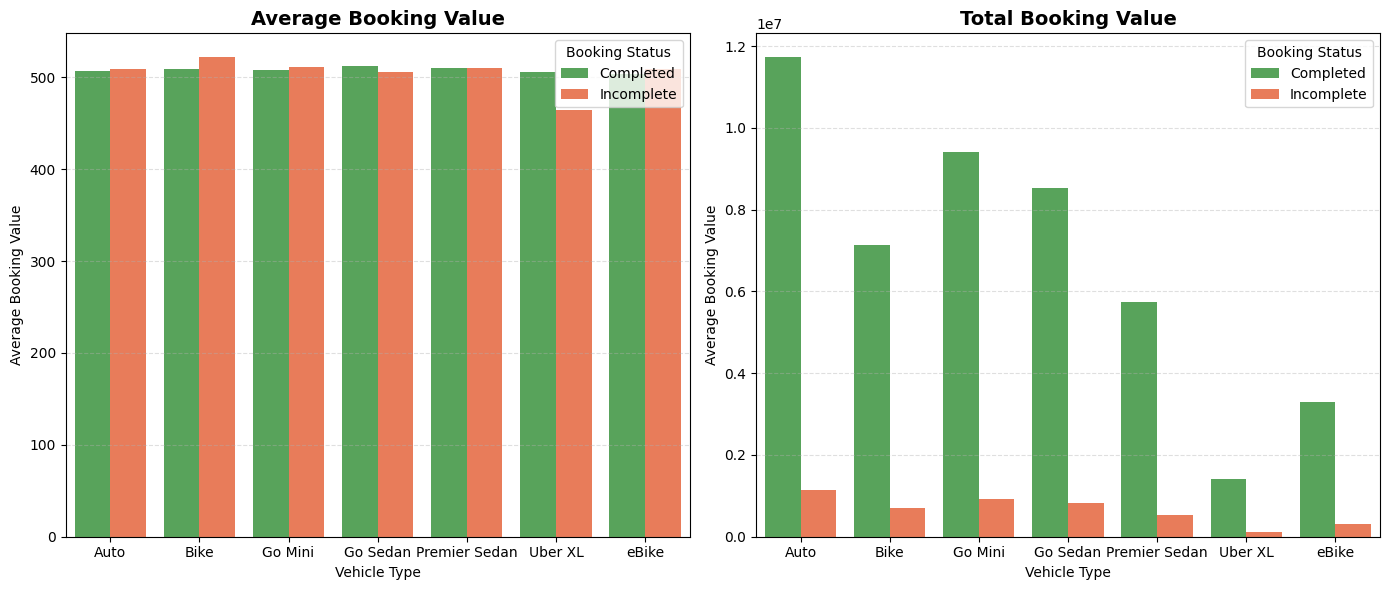

In [ ]:
# --- 1️⃣ Filter only completed and incomplete rides ---
df_vehicle_value = df_cleaned[df_cleaned['Booking Status'].isin(['Completed', 'Incomplete'])].copy()

# --- 2️⃣ Compute average booking value per vehicle type and status ---
vehicle_value = (
    df_vehicle_value.groupby(['Vehicle Type', 'Booking Status'])['Booking Value']
    .mean()
    .reset_index()
    .rename(columns={'Booking Value': 'Average Booking Value'})
)

vehicle_value_sum = (
    df_vehicle_value.groupby(['Vehicle Type', 'Booking Status'])['Booking Value']
    .sum()
    .reset_index()
    .rename(columns={'Booking Value': 'Average Booking Value'})
)

print("💰 Average Booking Value per Vehicle Type:")
print(vehicle_value)
print("💰 Total Booking Value per Vehicle Type:")
print(vehicle_value_sum)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# --- 3️⃣ Visualization: Bar plot comparison ---
ax[0].set_title("Average Booking Value", fontsize=14, weight='bold')
sns.barplot(
    data=vehicle_value,
    x='Vehicle Type',
    y='Average Booking Value',
    hue='Booking Status',
    palette=['#4CAF50', '#FF7043'],
    ax=ax[0]
)
ax[0].set_xlabel('Vehicle Type')
ax[0].set_ylabel('Average Booking Value')
ax[0].legend(title='Booking Status')
ax[0].grid(axis='y', linestyle='--', alpha=0.4)

ax[1].set_title("Total Booking Value", fontsize=14, weight='bold')
sns.barplot(
    data=vehicle_value_sum,
    x='Vehicle Type',
    y='Average Booking Value',
    hue='Booking Status',
    palette=['#4CAF50', '#FF7043'],
    ax=ax[1]
)
ax[1].set_xlabel('Vehicle Type')
ax[1].set_ylabel('Average Booking Value')
ax[1].legend(title='Booking Status')
ax[1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

---

**Which routes/locations generate the highest revenue?**


🛣️ Top 10 Revenue-Generating Routes:
                                        Route  Booking Value
0  New Delhi Railway Station → Rajouri Garden         9559.0
1         Cyber Hub → Gurgaon Railway Station         9348.0
2                 Nirman Vihar → Vatika Chowk         9284.0
3                 Ashok Vihar → Basai Dhankot         9280.0
4          Anand Vihar ISBT → Noida Film City         8960.0
5                Mayur Vihar → Samaypur Badli         8588.0
6                   Model Town → Jahangirpuri         8540.0
7                  Ambience Mall → Akshardham         8518.0
8                    Greater Noida → Jor Bagh         8252.0
9                  Noida Extension → Vaishali         8202.0


/tmp/ipython-input-1846499515.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


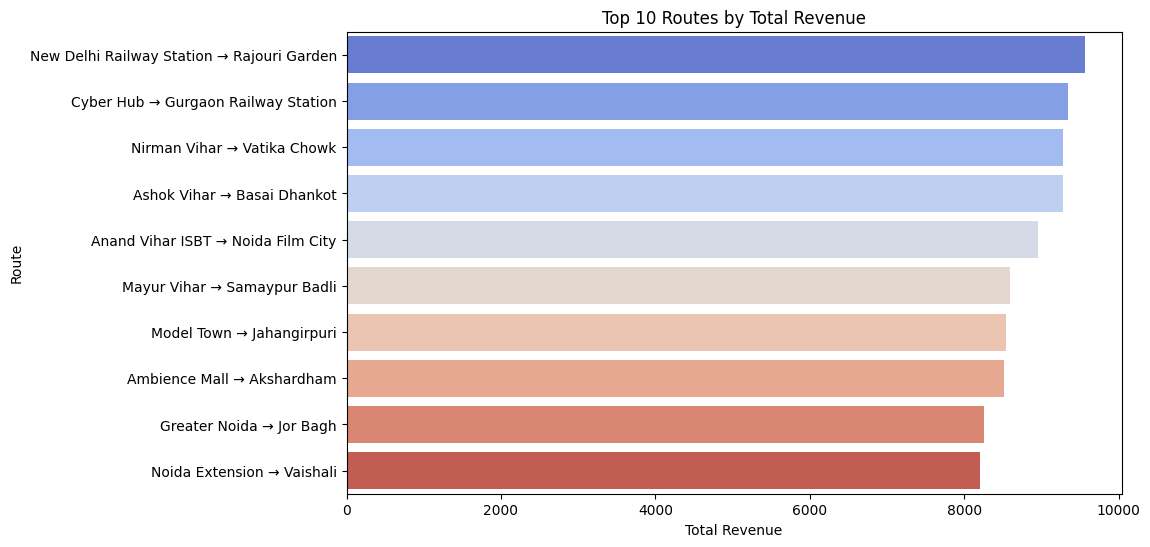

In [ ]:
df_cleaned['Route'] = df_cleaned['Pickup Location'] + " → " + df_cleaned['Drop Location']

top_routes = (
    df_cleaned.groupby('Route')['Booking Value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("\n🛣️ Top 10 Revenue-Generating Routes:")
print(top_routes)

# Bar chart visualization
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_routes,
    y='Route',
    x='Booking Value',
    palette='coolwarm'
)
plt.title("Top 10 Routes by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Route")
plt.show()

---

**How does ride distance affect booking value and cancellation rate?**

Tambahin kode buat ridenya itu completed


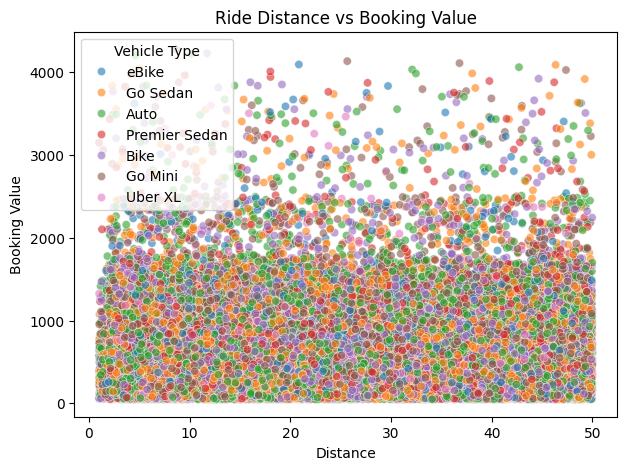

🔗 Correlation between distance and booking value: 0.01


/tmp/ipython-input-4120948390.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rev_by_dist = df_cleaned.groupby('Distance Range')['Booking Value'].mean().reset_index()
/tmp/ipython-input-4120948390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rev_by_dist, x='Distance Range', y='Booking Value', palette='Greens')


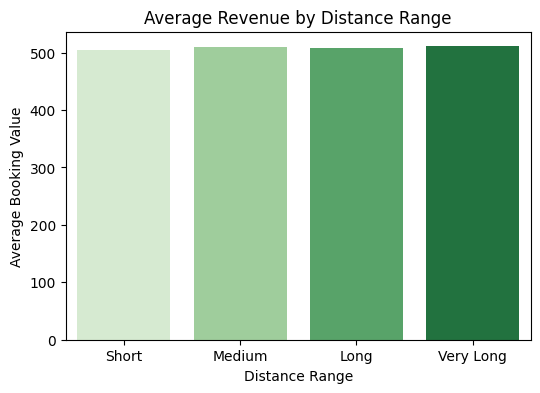

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_cleaned,
    x='Ride Distance',
    y='Booking Value',
    hue='Vehicle Type' if 'Vehicle Type' in df_cleaned.columns else None,
    alpha=0.6
)
plt.title("Ride Distance vs Booking Value")
plt.xlabel("Distance")
plt.ylabel("Booking Value")
plt.show()

# Correlation
corr_val = df_cleaned[['Ride Distance', 'Booking Value']].corr().iloc[0,1]
print(f"🔗 Correlation between distance and booking value: {corr_val:.2f}")

# Average revenue by distance range
df_cleaned['Distance Range'] = pd.qcut(df_cleaned['Ride Distance'], 4, labels=['Short', 'Medium', 'Long', 'Very Long'])
avg_rev_by_dist = df_cleaned.groupby('Distance Range')['Booking Value'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_rev_by_dist, x='Distance Range', y='Booking Value', palette='Greens')
plt.title("Average Revenue by Distance Range")
plt.ylabel("Average Booking Value")
plt.show()